<a href="https://colab.research.google.com/github/gyu-bin/mid_project/blob/main/%ED%83%84%EC%86%8C%EB%B0%B0%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 데이터 기본 확인
print("원본 데이터 형태:", df.shape)
print(df.head())
print(df.info())

# 3. 각 열의 결측치 개수 확인
missing_counts = df.isnull().sum()
print("열별 결측치 개수:")
print(missing_counts)

# 4. 결측치가 있는 행 제거 (행 기준으로 결측치 제거)
df_clean = df.dropna(subset=['year', 'country', 'co2'])

# 5. 'year' 열을 숫자형으로 변환
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce').astype(int)

# 6. 이상치 제거: 'co2' 열을 대상으로 IQR 기법 사용
Q1 = df_clean['co2'].quantile(0.25)
Q3 = df_clean['co2'].quantile(0.75)
IQR = Q3 - Q1
print("CO₂ Q1:", Q1, "Q3:", Q3, "IQR:", IQR)

# IQR 범위 내에 있는 데이터만 남김
df_clean = df_clean[(df_clean['co2'] >= Q1 - 1.5 * IQR) & (df_clean['co2'] <= Q3 + 1.5 * IQR)]

# 7. 전처리 후 데이터 확인
print("전처리 후 데이터 형태:", df_clean.shape)
print(df_clean.head())

원본 데이터 형태: (25989, 60)
  iso_code      country  year    co2  co2_per_capita  trade_co2  cement_co2  \
0      AFG  Afghanistan  1949  0.015           0.002        NaN         NaN   
1      AFG  Afghanistan  1950  0.084           0.011        NaN         NaN   
2      AFG  Afghanistan  1951  0.092           0.012        NaN         NaN   
3      AFG  Afghanistan  1952  0.092           0.012        NaN         NaN   
4      AFG  Afghanistan  1953  0.106           0.013        NaN         NaN   

   cement_co2_per_capita  coal_co2  coal_co2_per_capita  ...  \
0                    NaN     0.015                0.002  ...   
1                    NaN     0.021                0.003  ...   
2                    NaN     0.026                0.003  ...   
3                    NaN     0.032                0.004  ...   
4                    NaN     0.038                0.005  ...   

   ghg_excluding_lucf_per_capita  methane  methane_per_capita  nitrous_oxide  \
0                            NaN     

<ipython-input-2-b5e4ba6007bf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce').astype(int)


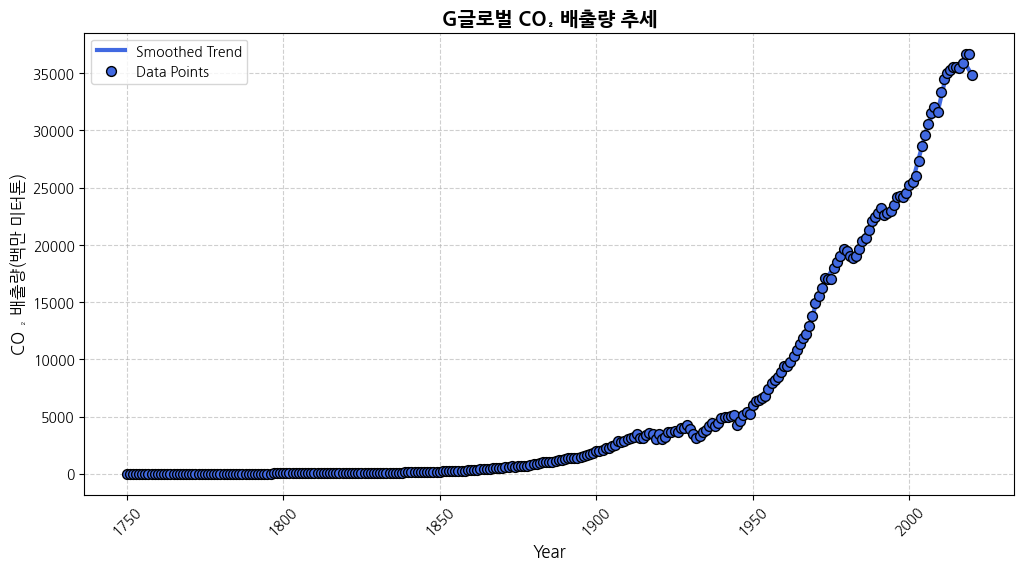

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # Spline 보간을 위한 모듈
import koreanize_matplotlib

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열에서 결측치 제거 (year, country, co2)
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 3. 전 세계 배출량 데이터 추출
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World']
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 4. 연도 순으로 정렬
df_world = df_world.sort_values('year')

# 5. 데이터 준비: x = 연도, y = CO₂ 배출량
x = df_world['year'].values
y = df_world['co2'].values

# 6. Spline 보간으로 부드러운 곡선 생성
#    촘촘한 점의 개수를 300에서 100으로 줄여서 여유로운 곡선 생성
x_smooth = np.linspace(x.min(), x.max(), 100)
spline = make_interp_spline(x, y, k=3)  # 3차 (cubic) spline
y_smooth = spline(x_smooth)

# 7. 시각화: 부드러운 곡선과 원래 데이터 포인트 표시
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, color='royalblue', linewidth=3, label='Smoothed Trend')
plt.scatter(x, y, color='royalblue', edgecolor='k', s=50, zorder=5, label='Data Points')
plt.title('G글로벌 CO₂ 배출량 추세', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO ₂ 배출량(백만 미터톤)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


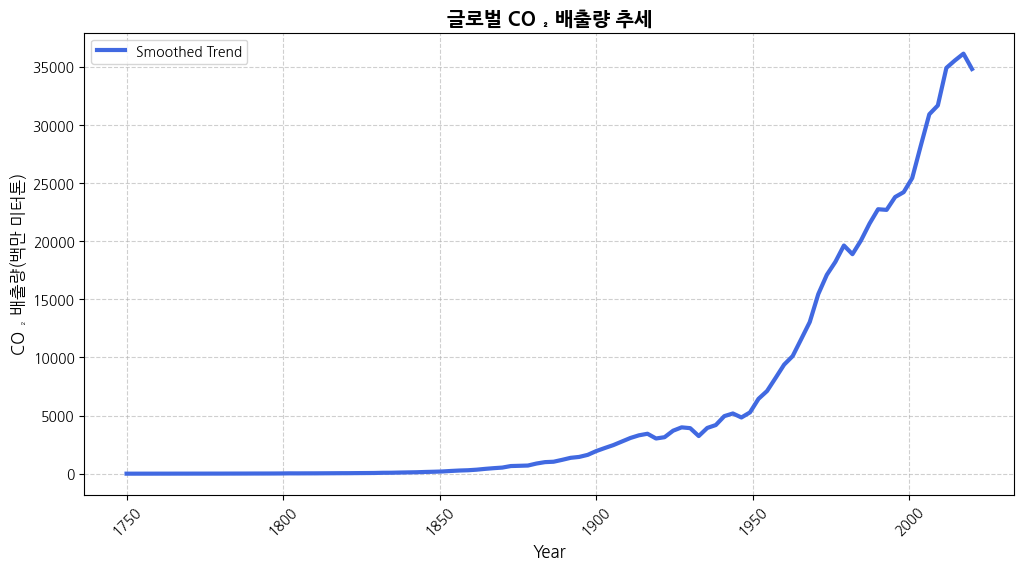

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import koreanize_matplotlib

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열에서 결측치 제거 (year, country, co2)
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 3. 전 세계 배출량 데이터 추출
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World']
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 4. 연도 순으로 정렬
df_world = df_world.sort_values('year')

# 5. 데이터 준비: x = 연도, y = CO₂ 배출량
x = df_world['year'].values
y = df_world['co2'].values

# 6. Spline 보간으로 부드러운 곡선 생성
x_smooth = np.linspace(x.min(), x.max(), 100)
spline = make_interp_spline(x, y, k=3)  # 3차 (cubic) spline
y_smooth = spline(x_smooth)

# 7. 시각화: 부드러운 곡선만 표시 (동그라미 제거)
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, color='royalblue', linewidth=3, label='Smoothed Trend')
plt.title('글로벌 CO ₂ 배출량 추세', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO ₂ 배출량(백만 미터톤)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


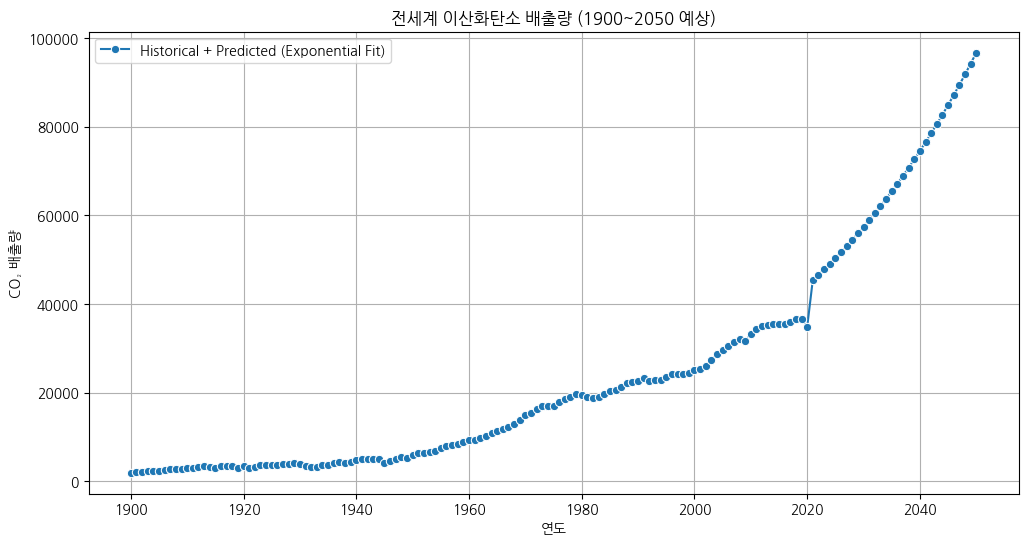

     year country           co2
141  2041   World  76495.803503
142  2042   World  78513.745115
143  2043   World  80584.919560
144  2044   World  82710.731109
145  2045   World  84892.621074
146  2046   World  87132.068792
147  2047   World  89430.592624
148  2048   World  91789.750982
149  2049   World  94211.143393
150  2050   World  96696.411576


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열만 사용 & 결측치 제거
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 3. 연도 필터링: 1900~2020년 데이터만 사용
df_clean = df_clean[(df_clean['year'] >= 1900) & (df_clean['year'] <= 2020)]

# 4. 전 세계 배출량 추출
#    country == 'World'가 있으면 사용하고, 없으면 모든 국가 합산
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World'].copy()
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 혹시 co2가 0 이하인 행이 있으면 로그 변환에 문제가 되므로 제거
df_world = df_world[df_world['co2'] > 0]

# 5. year 기준 정렬
df_world = df_world.sort_values('year').reset_index(drop=True)

# 6. 로그 변환(Exponential Regression 준비)
df_world['log_co2'] = np.log(df_world['co2'])

# 7. 학습 데이터 준비
X = df_world[['year']]             # 독립 변수: 연도
y_log = df_world['log_co2']        # 종속 변수: log(CO₂)

# 8. 선형 회귀 모델 훈련(로그 변환된 y 사용)
model = LinearRegression()
model.fit(X, y_log)

# 9. 2021~2050년 예측
future_years = np.arange(2021, 2051).reshape(-1, 1)
predicted_log_co2 = model.predict(future_years)
predicted_co2 = np.exp(predicted_log_co2)  # 로그를 되돌려 실제 CO₂ 배출량으로 복원

# 10. 예측 결과 DataFrame 생성
df_future = pd.DataFrame({
    'year': future_years.flatten(),
    'country': 'World',
    'co2': predicted_co2
})

# 11. 과거 + 미래 데이터 합쳐서 정렬
df_final = pd.concat([df_world[['year', 'country', 'co2']], df_future], ignore_index=True)
df_final = df_final.sort_values('year').reset_index(drop=True)

# 12. 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='co2', data=df_final, marker="o", label='Historical + Predicted (Exponential Fit)')
# plt.axvline(x=2020, color='red', linestyle='--', label='2020 기준선')
plt.title('전세계 이산화탄소 배출량 (1900~2050 예상)')
plt.xlabel('연도')
plt.ylabel('CO₂ 배출량')
plt.legend()
plt.grid(True)
plt.show()

# 예측 결과 일부 확인
print(df_final.tail(10))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


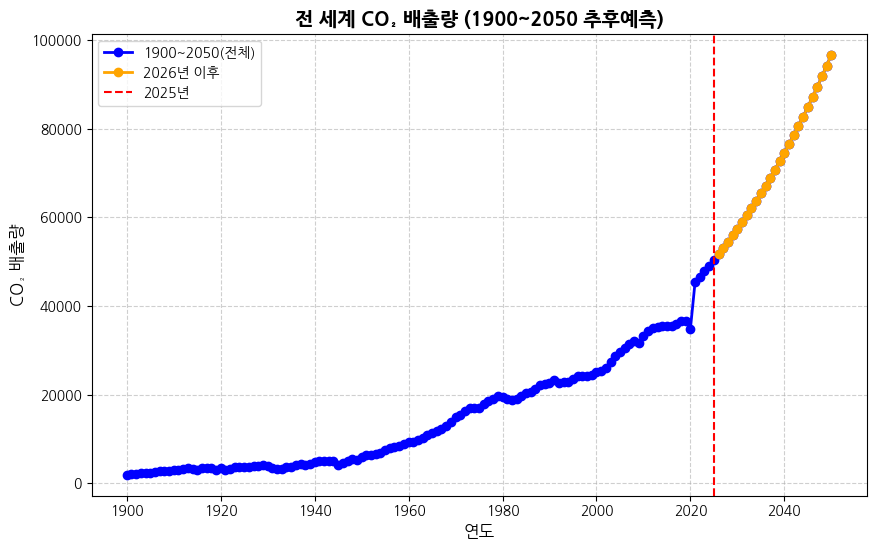

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib

# =========================================
# 1. 데이터 불러오기 및 기본 전처리
# =========================================
df = pd.read_csv('/content/owid-co2-data.csv')

# 필요한 열만 사용; 열이 존재하는지 확인
required_cols = ['year', 'country', 'co2', 'population']
for col in required_cols:
    if col not in df.columns:
        print(f"경고: {col} 열이 존재하지 않습니다. 일부 시각화가 정상적으로 동작하지 않을 수 있습니다.")

# 핵심 열에 결측치가 있는 행 제거
df_clean = df.dropna(subset=['year', 'country', 'co2'])

# 1900년부터 2020년까지 데이터 필터링 (초기 값이 너무 낮아 발생하는 왜곡 방지)
df_clean = df_clean[(df_clean['year'] >= 1900) & (df_clean['year'] <= 2020)]

# =========================================
# 2. 전 세계 CO₂ 배출량 추세 + 2050년 예측 (로그 변환 회귀)
# =========================================

# 전 세계 데이터 구성
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World'].copy()
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

df_world = df_world[df_world['co2'] > 0]  # 로그 변환을 위해 co2>0만 사용
df_world = df_world.sort_values('year').reset_index(drop=True)

# 로그 변환 회귀로 2050년까지 예측
df_world['log_co2'] = np.log(df_world['co2'])
X = df_world[['year']]
y_log = df_world['log_co2']

model = LinearRegression()
model.fit(X, y_log)

future_years = np.arange(2021, 2051).reshape(-1, 1)
predicted_log_co2 = model.predict(future_years)
predicted_co2 = np.exp(predicted_log_co2)

df_future = pd.DataFrame({'year': future_years.flatten(), 'co2': predicted_co2})
df_future = df_future.sort_values('year')

# 과거 + 예측 결합
df_hist = df_world[['year', 'co2']].copy()
df_hist['type'] = '과거'
df_future['type'] = '예측'

df_final = pd.concat([df_hist, df_future], ignore_index=True)
df_final = df_final.sort_values('year').reset_index(drop=True)

# =========================================
# 3. 시각화: 2025년까지 파란색, 2026년부터 주황색
# =========================================
plt.figure(figsize=(10, 6))

# (A) 전체 구간(1900~2050)을 파란색 선으로 그림
plt.plot(df_final['year'], df_final['co2'],
         color='blue', marker='o', linewidth=2, label='1900~2050(전체)')

# (B) 2026년 이후만 주황색으로 다시 그려서 덮어쓰기
df_after_2026 = df_final[df_final['year'] >= 2026]
plt.plot(df_after_2026['year'], df_after_2026['co2'],
         color='orange', marker='o', linewidth=2, label='2026년 이후')

# 수직선(2025년)
plt.axvline(x=2025, color='red', linestyle='--', label='2025년')

plt.title('전 세계 CO₂ 배출량 (1900~2050 추후예측)', fontsize=14, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('CO₂ 배출량', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


<ipython-input-7-97af2165063a>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='co2', y='country', palette='Blues_r')


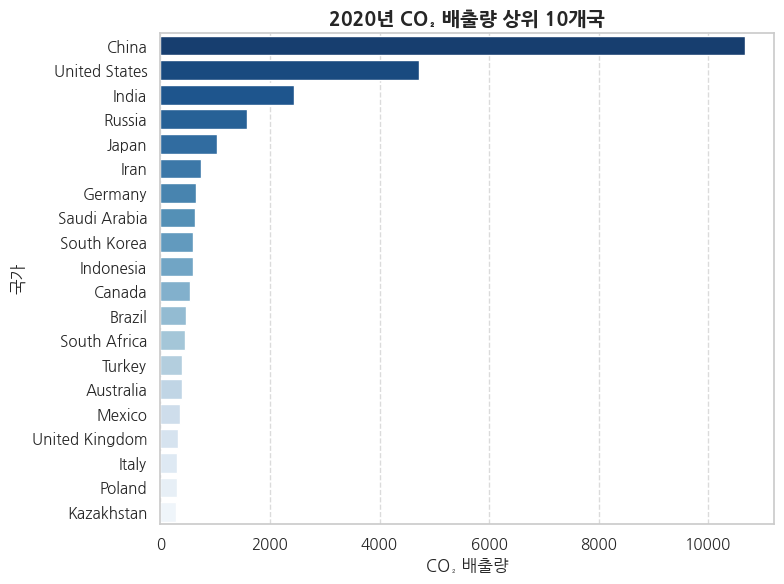

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마 및 한글 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 2. 2020년 데이터만 선택
df_2020 = df[df['year'] == 2020].copy()

# 3. 대륙/지역/소득 그룹 등 제외
exclude_list = [
    "World",
    "Asia",
    "Asia (excl. China & India)",
    "Africa",
    "Europe",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America",
    "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)",
    "European Union (28)",
    "High-income countries",
    "Upper-middle-income countries",
    "Lower-middle-income countries",
    "Low-income countries",
    "International transport"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# 4. 상위 10개국 추출 (CO₂ 배출량 기준)
df_top10 = df_2020[df_2020['co2'] > 0].sort_values('co2', ascending=False).head(20)

# 5. 수평 막대 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=df_top10, x='co2', y='country', palette='Blues_r')
plt.title('2020년 CO₂ 배출량 상위 10개국', fontsize=14, fontweight='bold')
plt.xlabel('CO₂ 배출량', fontsize=12)
plt.ylabel('국가', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-8-56759c2861b4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='co2', y='country', palette='Reds_r')


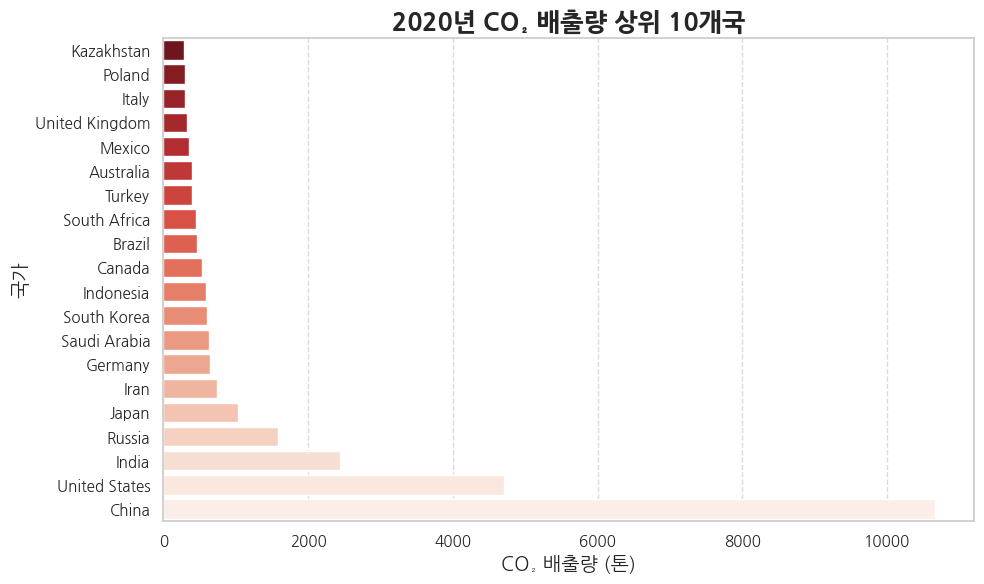

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 원하는 연도(예: 2020년) 데이터만 선택
target_year = 2020
df_2020 = df[df['year'] == target_year].copy()

# 2. 실제 국가만 남기기 위해, 대륙/소득 그룹 등 제외
exclude_list = [
    "World", "Asia", "Africa", "Europe", "North America", "South America",
    "Oceania", "European Union (27)", "European Union (28)",
    "Asia (excl. China & India)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America (excl. USA)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# 3. CO₂ 배출량 기준 상위 10개 국가 추출
df_top10 = df_2020[df_2020['co2'] > 0].sort_values('co2', ascending=False).head(20)
df_top10 = df_top10.sort_values('co2', ascending=True)  # 막대 그래프를 작은 값→큰 값 순으로 표시

# 4. 수평 막대 그래프 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=df_top10, x='co2', y='country', palette='Reds_r')
plt.title(f'{target_year}년 CO₂ 배출량 상위 10개국', fontsize=18, fontweight='bold')
plt.xlabel('CO₂ 배출량 (톤)', fontsize=14)
plt.ylabel('국가', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-9-8c4ad7dbd5a3>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_continent, x='co2', y='continent', palette='Blues_r')


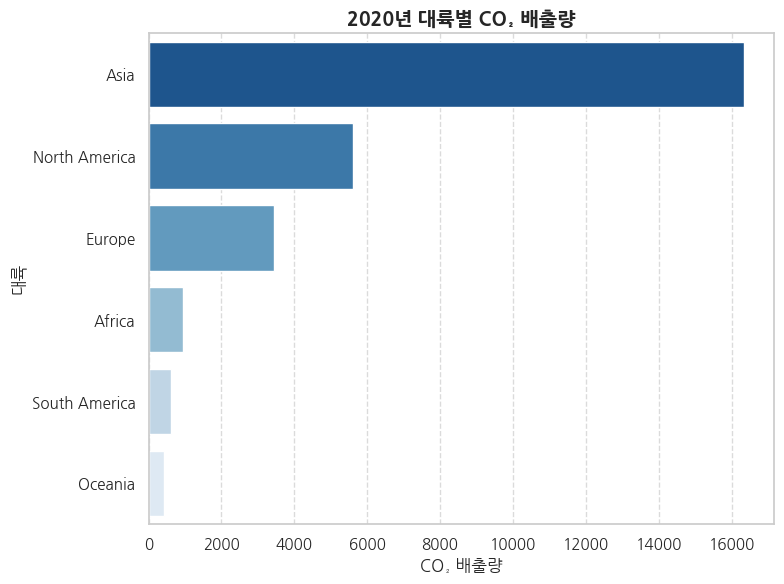

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마 및 한글 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# ------------------------------
# 1. 데이터 불러오기 및 전처리
# ------------------------------
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 2020년 데이터만 선택
df_2020 = df[df['year'] == 2020].copy()

# 대륙/지역/소득 그룹 등 제거 (실제 국가만 남김)
exclude_list = [
    "World",
    "Asia", "Asia (excl. China & India)",
    "Africa",
    "Europe", "Europe (excl. EU-27)", "Europe (excl. EU-28)",
    "North America", "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# ------------------------------
# 2. 국가 → 대륙 매핑 딕셔너리 예시
# ------------------------------
continent_mapping = {
    # 아시아
    "China": "Asia",
    "India": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "Indonesia": "Asia",
    "Saudi Arabia": "Asia",
    "Turkey": "Asia",
    # 유럽
    "Russia": "Europe",
    "Germany": "Europe",
    "United Kingdom": "Europe",
    "France": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    # 북아메리카
    "United States": "North America",
    "Canada": "North America",
    "Mexico": "North America",
    # 남아메리카
    "Brazil": "South America",
    "Argentina": "South America",
    # 아프리카
    "Egypt": "Africa",
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Algeria": "Africa",
    # 오세아니아
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    # ... 필요한 국가 계속 추가 ...
}

# ------------------------------
# 3. 대륙 정보 부여 (매핑)
# ------------------------------
df_2020['continent'] = df_2020['country'].map(continent_mapping)

# 대륙 정보가 없는(매핑되지 않은) 항목은 제외하거나 'Unknown'으로 처리
df_2020 = df_2020.dropna(subset=['continent'])

# ------------------------------
# 4. 대륙별 CO₂ 배출량 집계
# ------------------------------
df_continent = df_2020.groupby('continent', as_index=False)['co2'].sum()
# CO₂ 배출량이 큰 순으로 정렬
df_continent = df_continent.sort_values('co2', ascending=False).reset_index(drop=True)

# ------------------------------
# 5. 막대 그래프 시각화 (대륙별)
# ------------------------------
plt.figure(figsize=(8, 6))
sns.barplot(data=df_continent, x='co2', y='continent', palette='Blues_r')
plt.title('2020년 대륙별 CO₂ 배출량', fontsize=14, fontweight='bold')
plt.xlabel('CO₂ 배출량', fontsize=12)
plt.ylabel('대륙', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-10-a76514ad015d>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_decade, x='decade_label', y='co2', palette='YlOrBr')


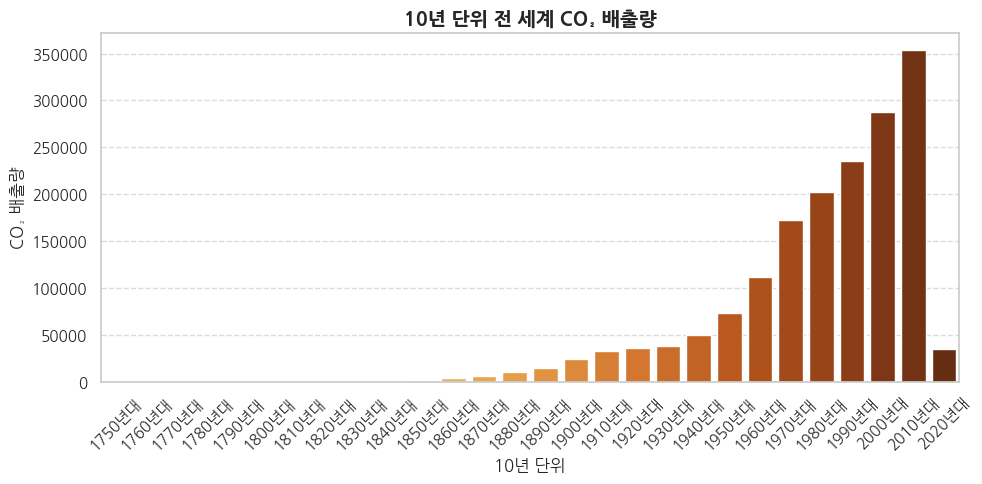

2020년대 데이터는 없으므로 2020년까지만 표시하였습니다.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# (예) 모든 국가 합계 사용
# 실제로 'World'가 있으면 그 행만 사용, 없으면 모든 국가 합산
if 'World' in df['country'].unique():
    # "World" 행만 사용
    df_world = df[df['country'] == 'World'].copy()
    df_clean = df_world[df_world['co2'] > 0].copy()
else:
    # 모든 국가 합계
    df_clean = df.groupby('year', as_index=False)['co2'].sum()
    df_clean = df_clean[df_clean['co2'] > 0].copy()

# 2. 10년 단위 'decade' 열 생성
df_clean['decade'] = (df_clean['year'] // 10) * 10

# 3. 10년 단위 CO₂ 배출량 집계 (합계)
df_decade = df_clean.groupby('decade', as_index=False)['co2'].sum()

# 4. decade를 오름차순 정렬 & 라벨링
df_decade = df_decade.sort_values('decade').reset_index(drop=True)
df_decade['decade_label'] = df_decade['decade'].astype(str) + '년대'

# 5. 2020년대 이후 데이터 제거: 2020년대는 데이터가 없으므로 2020년대(2020 이상)는 제외
df_decade = df_decade[df_decade['decade'] <= 2020]

# 6. 막대 그래프 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=df_decade, x='decade_label', y='co2', palette='YlOrBr')
plt.title('10년 단위 전 세계 CO₂ 배출량', fontsize=14, fontweight='bold')
plt.xlabel('10년 단위', fontsize=12)
plt.ylabel('CO₂ 배출량', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('2020년대 데이터는 없으므로 2020년까지만 표시하였습니다.')

<ipython-input-11-74762acc934f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)


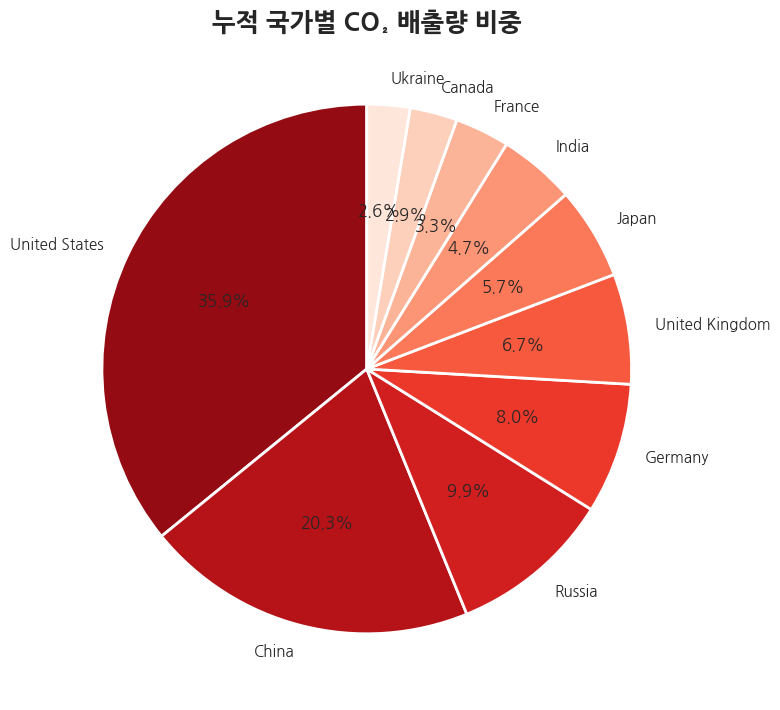

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 2. 누적 국가별 CO₂ 배출량 계산 (전체 기간 합계)
df_total = df.groupby('country', as_index=False)['co2'].sum()

# 3. 대륙/소득 그룹 등 제외
exclude_list = [
    "World", "Asia", "Africa", "Europe", "North America", "South America",
    "Oceania", "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport",
    "Asia (excl. China & India)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America (excl. USA)"
]
df_total = df_total[~df_total['country'].isin(exclude_list)]

# 4. 상위 10개 국가 추출 (누적 배출량 기준)
df_top10 = df_total.nlargest(10, 'co2').copy()

# 5. 누적 배출량 비중 계산
total_emissions = df_total['co2'].sum()
df_top10['비중'] = df_top10['co2'] / total_emissions * 100

# 6. 파이 차트 시각화
plt.figure(figsize=(8,8))
plt.pie(
    df_top10['비중'],
    labels=df_top10['country'],  # 국가명만 표시
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Reds_r', n_colors=10),
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
plt.title("누적 국가별 CO₂ 배출량 비중", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
Noto Sans 폰트 경로: /usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc


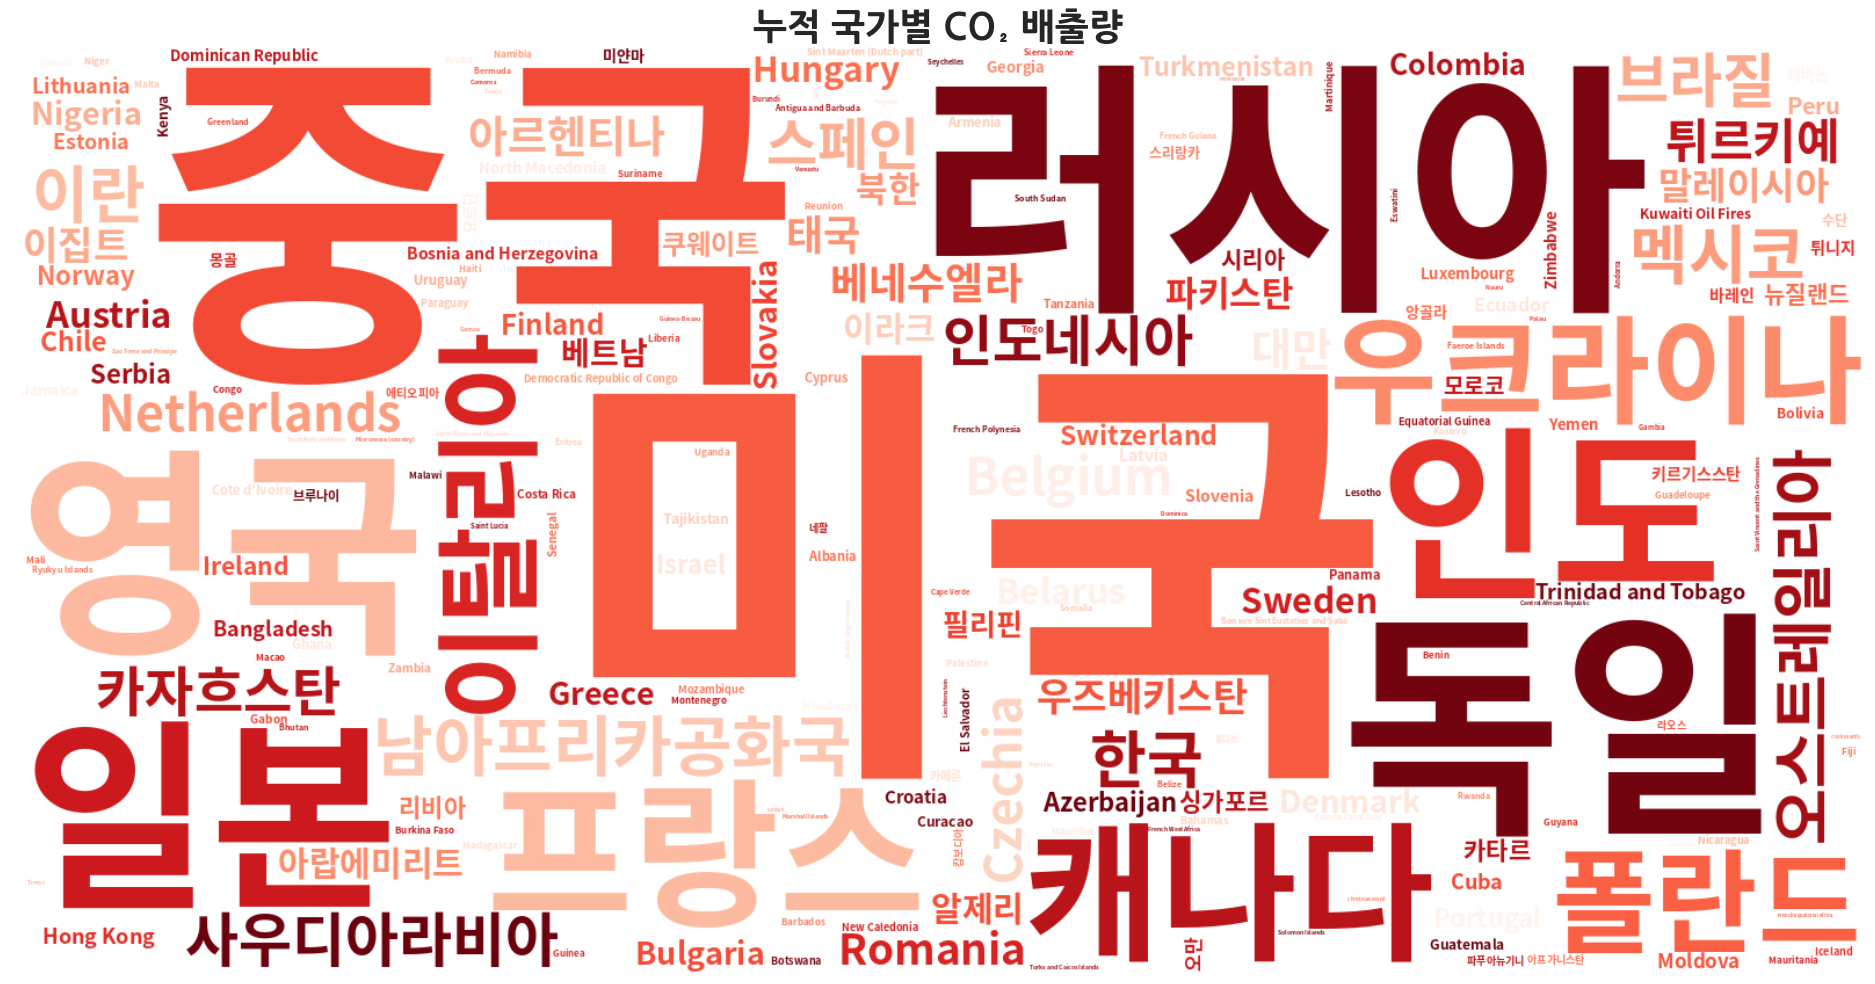

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import koreanize_matplotlib

# Colab에서 Noto Sans CJK 폰트 설치
!apt-get update -qq
!apt-get install fonts-noto-cjk -qq

# 시스템 폰트에서 Noto Sans CJK 찾기
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
noto_font = ''
for fp in font_paths:
    if 'NotoSansCJK' in fp:
        noto_font = fp
        break

if not noto_font:
    print("Noto Sans 폰트를 찾지 못했습니다. 다른 폰트를 시도하세요.")
else:
    print("Noto Sans 폰트 경로:", noto_font)

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 2. 누적 국가별 CO₂ 배출량 계산 (전체 연도의 합계)
emission_dict = df.groupby('country')['co2'].sum().to_dict()

# 3. 제외할 항목 (연합, 그룹 등)
exclude_list = [
    "World", "Asia", "Africa", "Europe", "North America", "South America",
    "Oceania", "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport",
    "Asia (excl. China & India)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America (excl. USA)"
]

# 4. 제외 목록에 해당하는 항목 제거 (영어 국가명을 기준으로)
emission_dict = {country: value for country, value in emission_dict.items() if country not in exclude_list}

# 5. 영어 → 한글 매핑 딕셔너리 (예시)
country_mapping = {
    "China": "중국",
    "United States": "미국",
    "India": "인도",
    "Russia": "러시아",
    "Japan": "일본",
    "Germany": "독일",
    "United Kingdom": "영국",
    "France": "프랑스",
    "South Korea": "한국",
    "North Korea": "북한",
    "Canada": "캐나다",
    "Brazil": "브라질",
    "Indonesia": "인도네시아",
    "Saudi Arabia": "사우디아라비아",
    "Malaysia": "말레이시아",
    "Poland": "폴란드",
    "Spain": "스페인",
    "Italy": "이탈리아",
    "Kazakhstan": "카자흐스탄",
    "Kyrgyzstan": "키르기스스탄",
    "Uzbekistan": "우즈베키스탄",
    "Egypt": "이집트",
    "Mexico": "멕시코",
    "Turkey": "튀르키예",
    "Pakistan": "파키스탄",
    "Qatar": "카타르",
    "Argentina": "아르헨티나",
    "South Africa": "남아프리카공화국",
    "Iraq": "이라크",
    "Algeria": "알제리",
    "Ukraine": "우크라이나",
    "Kuwait": "쿠웨이트",
    "Nepal": "네팔",
    "Angola": "앙골라",
    "Morocco": "모로코",
    "Libya": "리비아",
    "Chad": "차드",
    "United Arab Emirates": "아랍에미리트",
    "Myanmar": "미얀마",
    "Cameroon": "카메룬",
    "Iran": "이란",
    "Ethiopia": "에티오피아",
    "Tunisia": "튀니지",
    "Sudan": "수단",
    "Bahrain": "바레인",
    "Oman": "오만",
    "Syria": "시리아",
    "Lebanon": "레바논",
    "Jordan": "요르단",
    "Afghanistan": "아프가니스탄",
    "Mongolia": "몽골",
    "Thailand": "태국",
    "Vietnam": "베트남",
    "Laos": "라오스",
    "Cambodia": "캄보디아",
    "Philippines": "필리핀",
    "Sri Lanka": "스리랑카",
    "Singapore": "싱가포르",
    "Brunei": "브루나이",
    "Maldives": "몰디브",
    "Papua New Guinea": "파푸아뉴기니",
    "Australia": "오스트레일리아",
    "New Zealand": "뉴질랜드",
    "Taiwan": "대만",
    "Swden": "스웨덴",
    "Venezuela": "베네수엘라",
    # 필요 시 계속 추가...
}

# 6. 영어 국가명을 한글로 변환
emission_dict_kor = {}
for en_name, co2_val in emission_dict.items():
    kor_name = country_mapping.get(en_name, en_name)
    emission_dict_kor[kor_name] = co2_val

# 7. 워드클라우드 생성
wc = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='Reds',
    font_path=noto_font if noto_font else None,
    max_words=300
)
wordcloud = wc.generate_from_frequencies(emission_dict_kor)

# 8. 결과 시각화
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("누적 국가별 CO₂ 배출량", fontsize=26, fontweight='bold')
plt.tight_layout()
plt.show()

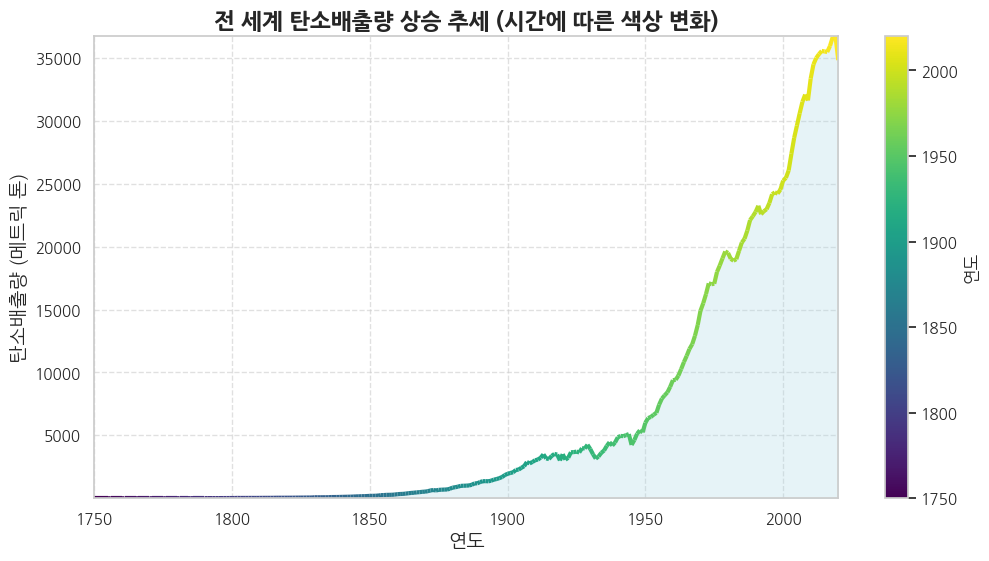

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors

# =========================================
# 1. 데이터 불러오기 및 전처리
# =========================================
# CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 필요한 열('year', 'country', 'co2')에 결측치 제거
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 전 세계 데이터 구성: 'World' 값이 있다면 사용, 없으면 연도별 합계 계산
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World'].copy()
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 분석을 위해 0보다 큰 탄소배출량만 사용
df_world = df_world[df_world['co2'] > 0]
# 연도별 오름차순 정렬
df_world = df_world.sort_values('year').reset_index(drop=True)

# =========================================
# 2. 창의적인 시각화: 그라데이션 효과가 있는 면적 차트
# =========================================
# x: 연도, y: 탄소배출량
x = df_world['year'].values
y = df_world['co2'].values

# 점들을 선분으로 연결할 준비 (그라데이션 효과를 위해)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# x 값(연도)에 따라 색상이 변화하도록 정규화 및 colormap 설정
norm = plt.Normalize(x.min(), x.max())
lc = mcoll.LineCollection(segments, cmap='viridis', norm=norm, linewidth=3)
lc.set_array(x)

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

# 그라데이션 선 추가
ax.add_collection(lc)
# 선의 범위를 업데이트하기 위해 투명 선을 그려줌
ax.plot(x, y, alpha=0)

# 선 아래 면적 채우기 (부드러운 느낌을 위해)
ax.fill_between(x, y, color='lightblue', alpha=0.3)

# 축 설정
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_title('전 세계 탄소배출량 상승 추세 (시간에 따른 색상 변화)', fontsize=16, fontweight='bold')
ax.set_xlabel('연도', fontsize=14)
ax.set_ylabel('탄소배출량 (메트릭 톤)', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)

# 색상 범례(컬러바) 추가: 연도를 기준으로 색상이 변화함을 표시
cb = fig.colorbar(lc, ax=ax)
cb.set_label('연도', fontsize=12)

plt.show()


In [14]:
import pandas as pd
import plotly.express as px
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열('year', 'iso_code', 'co2', 'country') 결측치 제거
df = df.dropna(subset=['year', 'iso_code', 'co2', 'country'])

# 3. 기간 필터링: 1750년부터 2020년까지 (원하는 연도 범위 설정)
df = df[(df['year'] >= 1750) & (df['year'] <= 2020)]

# 4. 국가별, 연도별 중복 데이터가 있을 경우 평균 CO₂ 배출량으로 집계
df_grouped = df.groupby(['year', 'iso_code', 'country'], as_index=False)['co2'].mean()

# 5. 극단값 완화를 위한 99% 분위수(quantile) 계산
#    예) 상위 1%를 초과하는 값은 모두 동일한 최댓값(색상)으로 처리
max_co2_99 = df_grouped['co2'].quantile(0.99)

# 6. 사용자 지정 색상 스케일 (5단계 예시: 분홍~빨강)
custom_scale = [
    "#fee0d2", "#fc9272", "#ef3b2c", "#cb181d", "#67000d"
]

# 7. Choropleth 시각화 (Plotly Express)
fig = px.choropleth(
    df_grouped,
    locations='iso_code',         # 국가 ISO 코드 열
    color='co2',                  # 색상으로 표시할 값 (CO₂ 배출량)
    hover_name='country',         # 마우스 오버 시 표시할 국가명
    animation_frame='year',       # 연도별 애니메이션 슬라이더 생성
    color_continuous_scale=custom_scale,
    # range_color=(0, df_grouped['co2'].max())  # 실제 최댓값 기준 (극단값이 있으면 옅게 보일 수 있음)
    range_color=(0, max_co2_99),   # 상위 1%를 잘라낸 색상 범위 설정
    title='전 세계 CO₂ 배출량 (1750년 ~ 2020년)'
)

# 8. 컬러바(색상 범례) 설정
tick_vals = [0, max_co2_99*0.25, max_co2_99*0.5, max_co2_99*0.75, max_co2_99]
tick_text = [f"{val:,.0f}" for val in tick_vals]

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(
        title='CO₂ 배출량 (톤)',
        tickvals=tick_vals,
        ticktext=tick_text
    )
)

fig.show()


데이터셋 컬럼 예시: ['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'trade_co2', 'cement_co2', 'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_industry_co2', 'other_co2_per_capita', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_gdp', 'co2_per_unit_energy', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_co2', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'trade_co2_share', 'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2', 'share_global_flaring_co2', 'share_global_gas_co2', 'share_global_oil_co2', 'share_global_other_co2', 'share_global_cumulative_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2', 'share_g

<ipython-input-15-43b13c48922e>:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




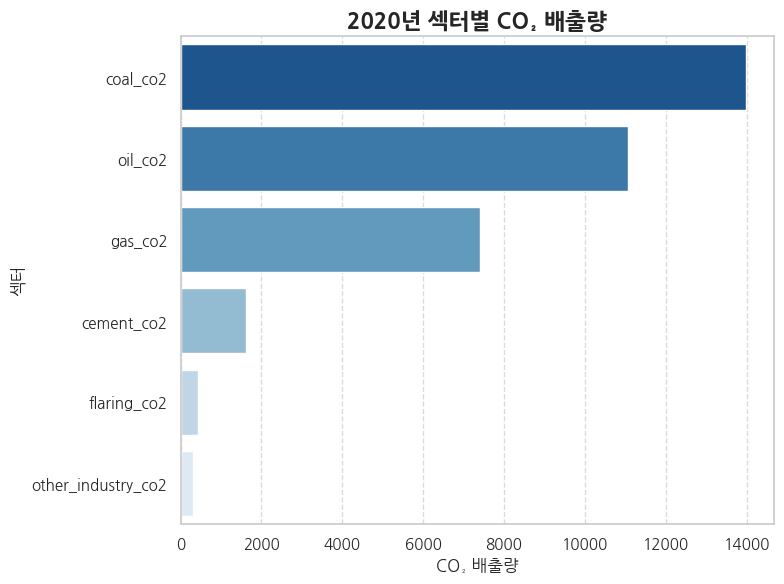

2020년 섹터별 CO₂ 배출량(단위: 메트릭 톤 등)
                   섹터        배출량
0            coal_co2  13976.098
1             oil_co2  11072.501
2             gas_co2   7399.509
3          cement_co2   1626.371
4         flaring_co2    435.034
5  other_industry_co2    297.746

가장 많은 CO₂ 배출 섹터: coal_co2 (배출량: 13976.10)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마 및 한글 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

########################################
# 1. 데이터 불러오기
########################################
df = pd.read_csv('/content/owid-co2-data.csv')

# 필요한 열이 있는지 확인(예: 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2')
print("데이터셋 컬럼 예시:", df.columns.tolist())

########################################
# 2. 결측치 제거 및 연도 설정 (예: 최신 연도)
########################################
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
latest_year = df['year'].max()

# 3. 최신 연도(또는 원하는 연도)만 필터링
df_latest = df[df['year'] == latest_year].copy()

# 4. World 항목이 있으면 그 행만 사용, 없으면 전체 국가 합산
if 'World' in df_latest['country'].unique():
    df_world = df_latest[df_latest['country'] == 'World']
else:
    # 모든 국가 합계
    df_world = df_latest.groupby('year', as_index=False).sum()

########################################
# 5. 섹터별 배출량 추출
########################################
sectors = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']
sector_emissions = {}
for sector in sectors:
    if sector in df_world.columns:
        # df_world이 1행만 있을 것이므로 .values[0]로 단일 값 추출
        sector_emissions[sector] = df_world[sector].values[0]
    else:
        sector_emissions[sector] = 0  # 해당 열이 없으면 0 처리

########################################
# 6. 바 차트 시각화
########################################
# 딕셔너리를 DataFrame으로 변환
df_sectors = pd.DataFrame(list(sector_emissions.items()), columns=['섹터', '배출량'])
# 배출량 내림차순 정렬 (옵션)
df_sectors = df_sectors.sort_values('배출량', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_sectors, x='배출량', y='섹터', palette='Blues_r')
plt.title(f'{latest_year}년 섹터별 CO₂ 배출량', fontsize=16, fontweight='bold')
plt.xlabel('CO₂ 배출량', fontsize=12)
plt.ylabel('섹터', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

########################################
# 7. 어떤 섹터가 가장 많은지 출력
########################################
max_sector = df_sectors.iloc[0]
print(f"{latest_year}년 섹터별 CO₂ 배출량(단위: 메트릭 톤 등)")
print(df_sectors)
print(f"\n가장 많은 CO₂ 배출 섹터: {max_sector['섹터']} (배출량: {max_sector['배출량']:.2f})")


In [16]:
import pandas as pd
import plotly.express as px

#############################################
# 1. 데이터 불러오기 및 전처리
#############################################
df = pd.read_csv('/content/owid-co2-data.csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['year', 'country'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# "World" 행 제외 (누적 배출량을 모든 국가 합산으로 계산하기 위함)
df = df[df['country'] != 'World']

# 분석할 섹터 리스트
sectors = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']

# 필요한 열만 선택하여 결측치를 0으로 채움
df_sectors = df[sectors].fillna(0)

# 전체 기간(누적) 동안의 각 부문별 배출량 합계 계산
sector_sum = df_sectors.sum()

#############################################
# 2. 영어 섹터명을 한글로 변환
#############################################
sector_mapping = {
    'coal_co2': '석탄',
    'oil_co2': '석유',
    'gas_co2': '천연가스',
    'cement_co2': '시멘트',
    'flaring_co2': '플래어링',
    'other_industry_co2': '기타 산업'
}

sector_kor = []
emissions_val = []
for eng_name, val in sector_sum.items():
    kor_name = sector_mapping.get(eng_name, eng_name)
    if val > 0:
        sector_kor.append(kor_name)
        emissions_val.append(val)

# DataFrame 구성
df_sector = pd.DataFrame({
    '부문': sector_kor,
    '배출량': emissions_val
})

#############################################
# 3. Plotly로 파이 차트 생성 (인터랙티브)
#############################################
fig = px.pie(
    data_frame=df_sector,
    names='부문',
    values='배출량',
    color='부문',  # 부문별 색상 구분
    color_discrete_sequence=px.colors.sequential.Reds[::-1],  # 색상 팔레트 (진한 빨강부터 연하게)
    title='전체 기간 누적 부문별 CO₂ 배출량 비중 (모든 국가 합산)',
)

fig.show()

<ipython-input-17-669617fd910b>:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




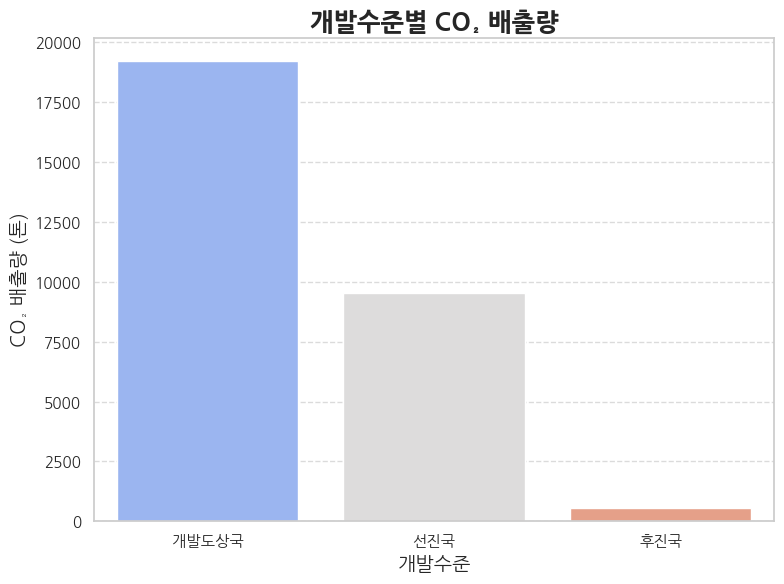

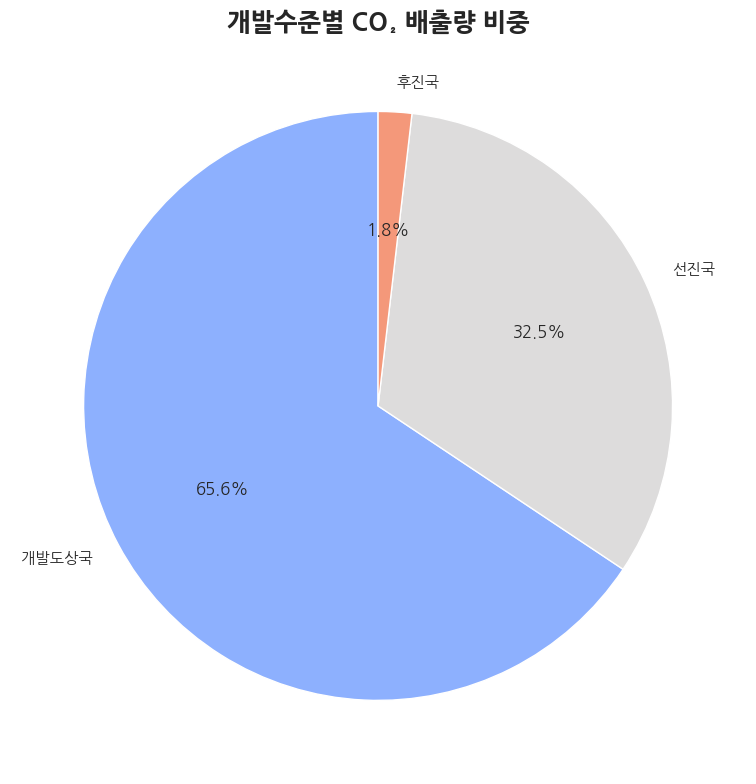

중국, 인도가 개발도상국으로 분류되어있어 탄소배출량이 선진국 보다 높다. 인구와도 관련이 있다.
그럼 반드시 선진국이라고 배출이 아닌 인구수가 중요한게 아닐까
GDP도 연관이 있겠지만 재생에너지도 연관이 있을수 있다.
다만, 1인당 탄소 배출량은 단순히 인구수만으로 결정되는 것이 아니라, 해당 국가의 경제 구조, 에너지 효율, 산업화 수준, 기술 발전, 환경 정책 등 여러 요인에 의해 달라진다.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마와 한글 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

#############################################
# 1. 데이터 불러오기 및 전처리
#############################################
df = pd.read_csv('/content/owid-co2-data.csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 분석 대상 연도: 2020년 (원하는 연도로 수정 가능)
target_year = 2020
df_year = df[df['year'] == target_year].copy()

# "World" 및 대륙/소득 그룹 등 실제 국가가 아닌 항목 제거
exclude_list = [
    "World",
    "Asia", "Asia (excl. China & India)",
    "Africa",
    "Europe", "Europe (excl. EU-27)", "Europe (excl. EU-28)",
    "North America", "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport"
]
df_year = df_year[~df_year['country'].isin(exclude_list)].copy()

#############################################
# 2. 선진국, 개발도상국, 후진국 분류 (예시)
#############################################
advanced_countries = [
    "United States", "Canada", "Japan", "Germany", "United Kingdom", "France",
    "South Korea", "Australia", "New Zealand", "Switzerland", "Sweden",
    "Norway", "Denmark", "Finland", "Italy", "Spain", "Netherlands", "Austria", "Belgium"
]

developing_countries = [
    "China", "India", "Brazil", "Russia", "Mexico", "Indonesia", "Turkey",
    "South Africa", "Argentina", "Saudi Arabia", "Iran", "Thailand", "Malaysia",
    "Colombia", "Philippines"
]

underdeveloped_countries = [
    "Pakistan", "Bangladesh", "Nigeria", "Ethiopia", "DR Congo", "Afghanistan",
    "Nepal", "Uganda", "Tanzania", "Sudan", "Mozambique", "Burundi"
]

def classify_country(country):
    if country in advanced_countries:
        return "선진국"
    elif country in developing_countries:
        return "개발도상국"
    elif country in underdeveloped_countries:
        return "후진국"
    else:
        return "기타"

df_year["개발수준"] = df_year["country"].apply(classify_country)

#############################################
# 3. "기타" 그룹 제외
#############################################
df_year = df_year[df_year["개발수준"] != "기타"].copy()

#############################################
# 4. 그룹별 CO₂ 배출량 집계
#############################################
group_emissions = df_year.groupby("개발수준")["co2"].sum().reset_index()

#############################################
# 5. 시각화
#############################################
# (A) 막대 차트: 그룹별 CO₂ 배출량
plt.figure(figsize=(8,6))
sns.barplot(data=group_emissions, x='개발수준', y='co2', palette="coolwarm")
plt.title(f'개발수준별 CO₂ 배출량', fontsize=18, fontweight='bold')
plt.xlabel('개발수준', fontsize=14)
plt.ylabel('CO₂ 배출량 (톤)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# (B) 파이 차트: 그룹별 CO₂ 배출량 비중
plt.figure(figsize=(8,8))
colors = sns.color_palette("coolwarm", n_colors=len(group_emissions))
plt.pie(
    group_emissions['co2'],
    labels=group_emissions['개발수준'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title(f'개발수준별 CO₂ 배출량 비중', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print('중국, 인도가 개발도상국으로 분류되어있어 탄소배출량이 선진국 보다 높다. 인구와도 관련이 있다.');
print('그럼 반드시 선진국이라고 배출이 아닌 인구수가 중요한게 아닐까');
print('GDP도 연관이 있겠지만 재생에너지도 연관이 있을수 있다.');
print('다만, 1인당 탄소 배출량은 단순히 인구수만으로 결정되는 것이 아니라, 해당 국가의 경제 구조, 에너지 효율, 산업화 수준, 기술 발전, 환경 정책 등 여러 요인에 의해 달라진다.');

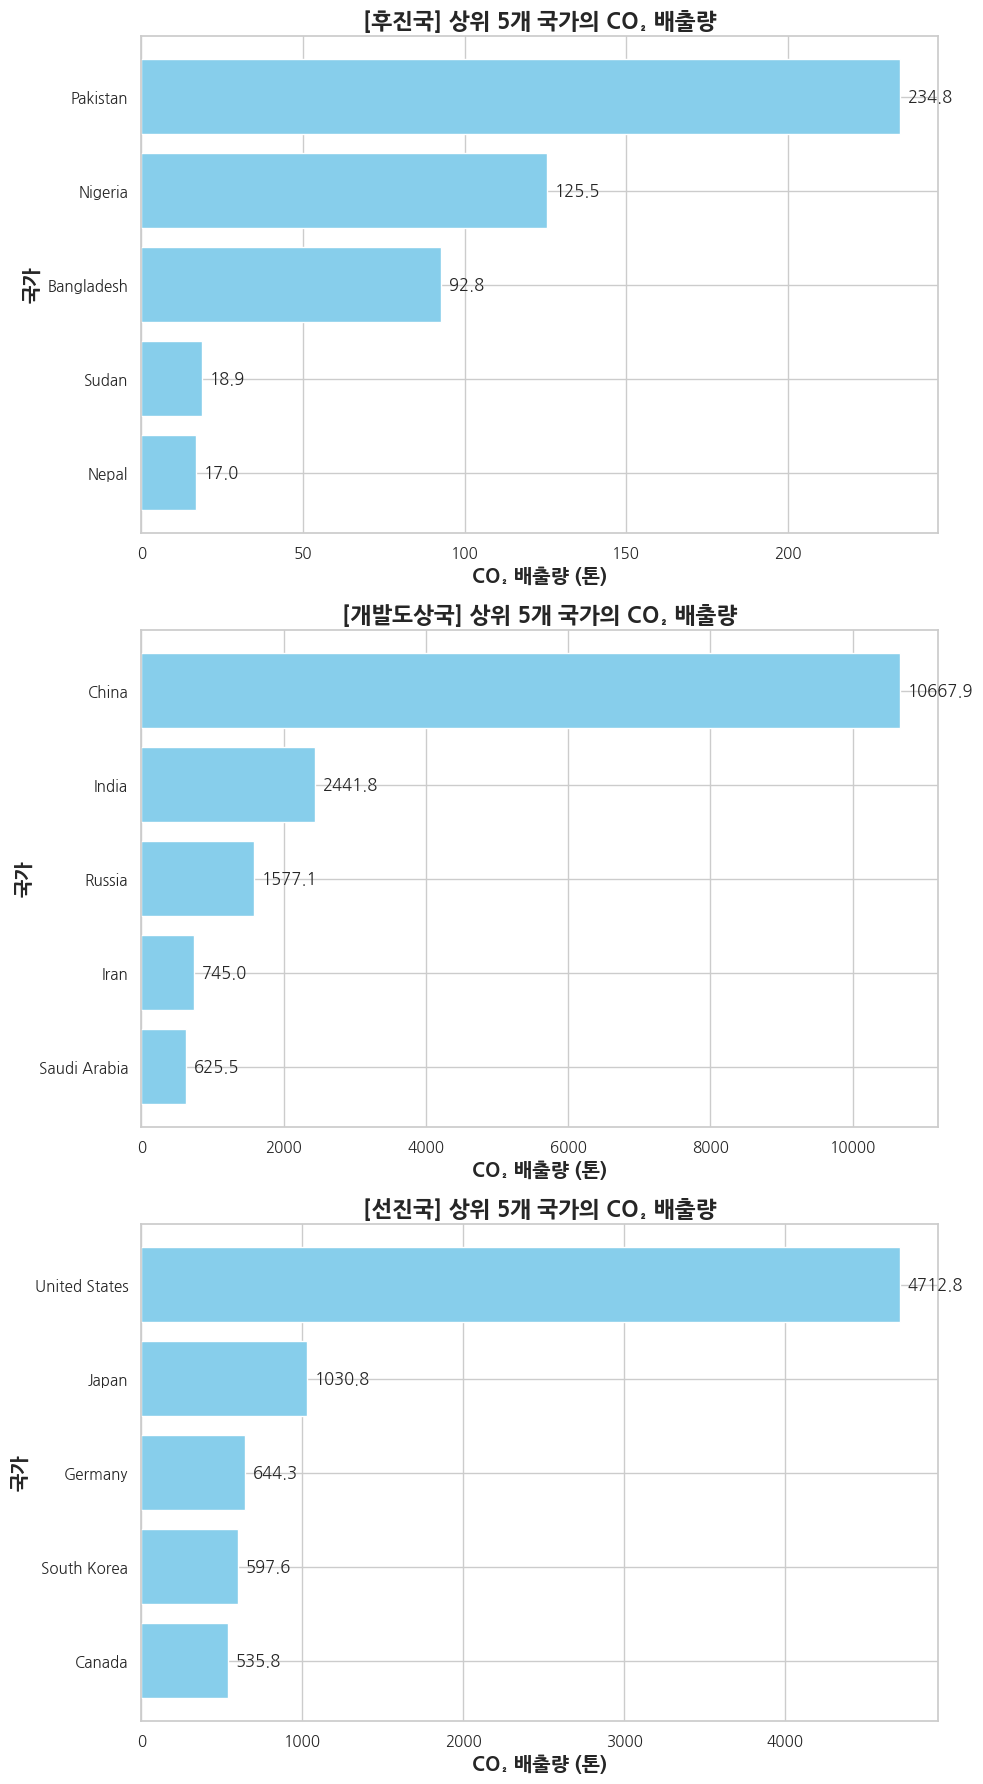

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 전처리 ---
# df_year는 2020년 데이터를 포함한 전처리된 데이터프레임으로 가정
# 필수 열: 'country', 'year', 'co2', '개발수준'
# 예시로 df_year를 복사하여 사용합니다.
# (예: OWID CO₂ 데이터에서 "High-income countries", "Upper-middle-income countries", "Lower-middle-income countries", "Low-income countries" 행이 포함되어 있음)

# 상위 5개 국가 추출
top_n = 5
top_countries_by_level = {}
for level in df_year["개발수준"].unique():
    df_level = df_year[df_year["개발수준"] == level]
    df_level_sorted = df_level.sort_values(by="co2", ascending=False)
    top_countries = df_level_sorted[['country', 'co2']].head(top_n)
    top_countries_by_level[level] = top_countries

# --- 시각화: 각 그룹별 수평 막대 그래프 (개별 서브플롯) ---
groups = list(top_countries_by_level.keys())
n_groups = len(groups)

fig, axes = plt.subplots(n_groups, 1, figsize=(10, 6*n_groups))

# 서브플롯이 1개인 경우 리스트로 변환
if n_groups == 1:
    axes = [axes]

for ax, group in zip(axes, groups):
    data = top_countries_by_level[group]
    # 수평 막대 그래프: 값이 높은 국가가 위쪽에 위치하도록 오름차순 정렬
    data_sorted = data.sort_values(by="co2", ascending=True)
    ax.barh(data_sorted["country"], data_sorted["co2"], color='skyblue')
    ax.set_title(f"[{group}] 상위 {top_n}개 국가의 CO₂ 배출량", fontsize=16, fontweight='bold')
    ax.set_xlabel("CO₂ 배출량 (톤)", fontsize=14, fontweight='bold')
    ax.set_ylabel("국가", fontsize=14, fontweight='bold')

    # 각 막대 옆에 값 표시
    max_val = data_sorted["co2"].max()
    for i, v in enumerate(data_sorted["co2"]):
        ax.text(v + 0.01 * max_val, i, f"{v:.1f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()

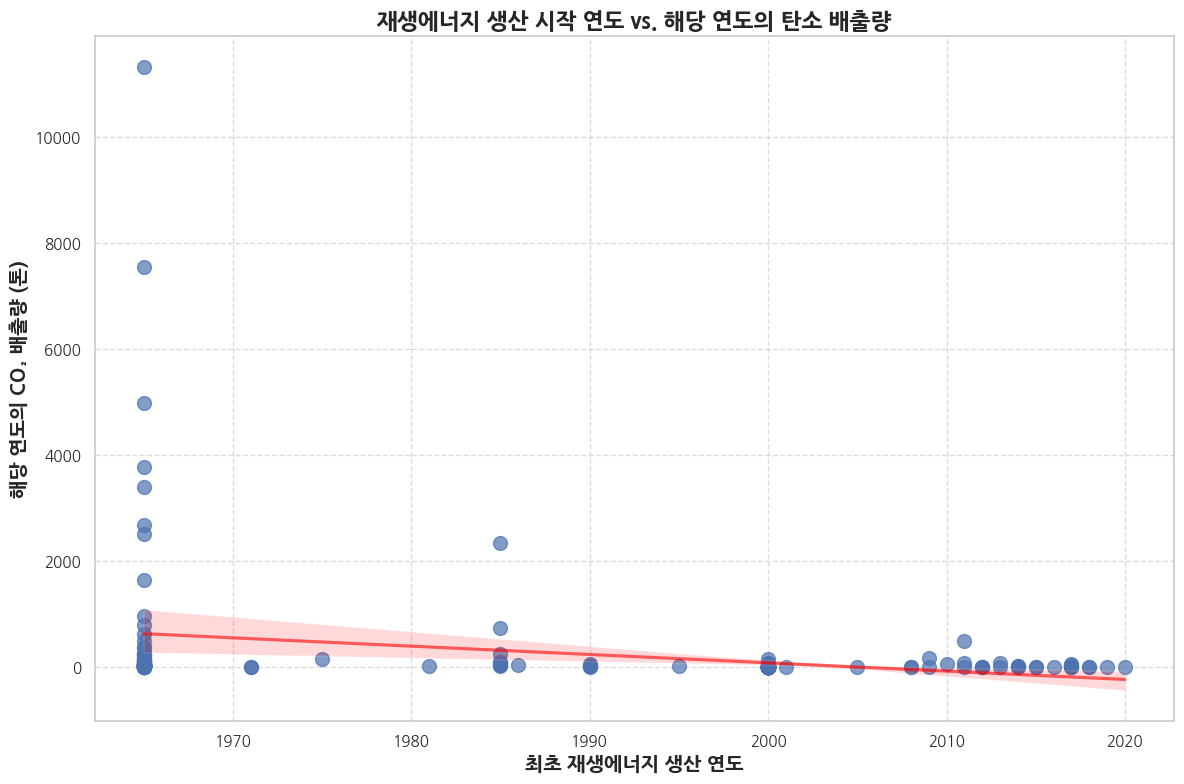

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

##################################
# 1. 재생에너지 데이터 전처리
##################################
df_renew = pd.read_csv('/content/03 modern-renewable-prod.csv')
df_renew.columns = df_renew.columns.str.strip()

# 'Entity', 'Year' 결측치 제거
df_renew = df_renew.dropna(subset=['Entity', 'Year'])
df_renew['Year'] = pd.to_numeric(df_renew['Year'], errors='coerce').astype(int)

# 재생에너지 관련 열(숫자형 변환, 결측치는 0 처리)
energy_cols = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]
for col in energy_cols:
    df_renew[col] = pd.to_numeric(df_renew[col], errors='coerce').fillna(0)

# 총 재생에너지 생산량
df_renew['Total Renewable (TWh)'] = df_renew[energy_cols].sum(axis=1)

# 각 국가별 총 재생에너지가 0을 초과한 '최초 연도' 추출
first_renew = (
    df_renew[df_renew['Total Renewable (TWh)'] > 0]
    .groupby('Entity')['Year'].min()
    .reset_index()
    .rename(columns={'Year': 'FirstRenewYear'})
)

##################################
# 2. 탄소 배출량 데이터 전처리
##################################
df_co2 = pd.read_csv('/content/owid-co2-data.csv')
df_co2.columns = df_co2.columns.str.strip()

df_co2 = df_co2.dropna(subset=['country', 'year', 'co2'])
df_co2['year'] = pd.to_numeric(df_co2['year'], errors='coerce').astype(int)

##################################
# 3. (국가, FirstRenewYear)에 해당하는 CO2 가져오기
##################################
# 병합을 위해, df_co2에서 year와 country를 기준으로 매칭
# 병합 후, x축(FirstRenewYear), y축(해당 연도의 co2)
df_merge = pd.merge(
    first_renew,
    df_co2,
    left_on=['Entity','FirstRenewYear'],
    right_on=['country','year'],
    how='inner'
)

# df_merge에는 now ['Entity','FirstRenewYear','country','year','co2'] 등 열이 존재

##################################
# 4. 시각화: x=FirstRenewYear, y=co2
##################################
plt.figure(figsize=(12,8))
sns.regplot(
    data=df_merge,
    x='FirstRenewYear',
    y='co2',
    scatter_kws={'s':100, 'alpha':0.7},
    line_kws={'color':'red', 'alpha':0.6}
)
plt.title("재생에너지 생산 시작 연도 vs. 해당 연도의 탄소 배출량", fontsize=16, fontweight='bold')
plt.xlabel("최초 재생에너지 생산 연도", fontsize=14, fontweight='bold')
plt.ylabel("해당 연도의 CO₂ 배출량 (톤)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

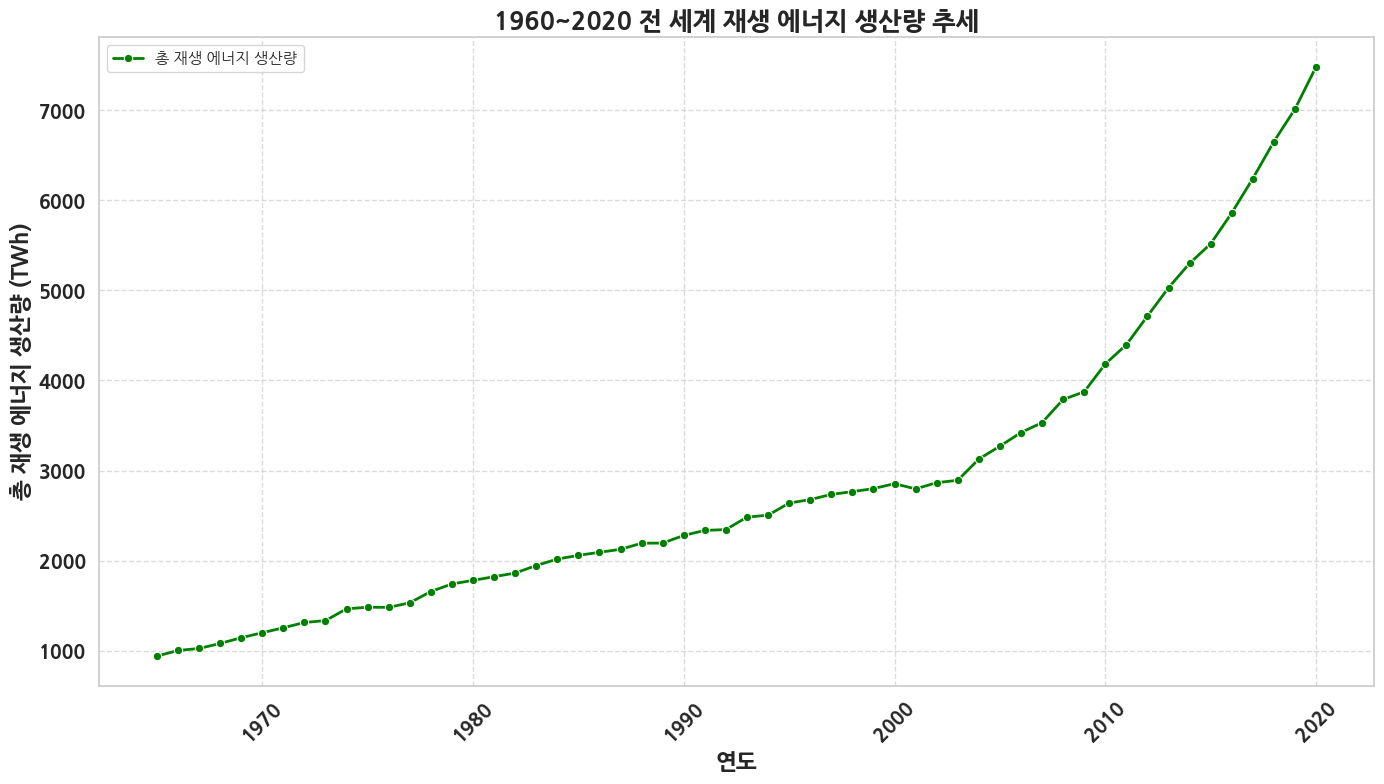

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 재생에너지 데이터 불러오기 및 전처리 (03 modern-renewable-prod.csv)
df_renew = pd.read_csv('/content/03 modern-renewable-prod.csv')
df_renew.columns = df_renew.columns.str.strip()
df_renew = df_renew.dropna(subset=['Entity', 'Year'])
df_renew['Year'] = pd.to_numeric(df_renew['Year'], errors='coerce').astype(int)

# 재생에너지 관련 열
energy_cols = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]
for col in energy_cols:
    df_renew[col] = pd.to_numeric(df_renew[col], errors='coerce').fillna(0)

# 총 재생에너지 생산량 계산
df_renew['Total Renewable (TWh)'] = df_renew[energy_cols].sum(axis=1)

# 전 세계 데이터를 대표하기 위해 'World' 행이 있다면 그 행 사용, 없으면 국가별 합산
if 'World' in df_renew['Entity'].unique():
    df_world_renew = df_renew[df_renew['Entity'] == 'World'].copy()
else:
    df_world_renew = df_renew.groupby('Year', as_index=False)['Total Renewable (TWh)'].sum()

df_world_renew = df_world_renew.sort_values('Year')

# 분석 기간: 예를 들어 1960년부터 2020년까지 (필요에 따라 조정)
df_world_renew = df_world_renew[(df_world_renew['Year'] >= 1960) & (df_world_renew['Year'] <= 2020)]

# 시각화
plt.figure(figsize=(14,8))
sns.lineplot(data=df_world_renew, x='Year', y='Total Renewable (TWh)', marker='o', color='green', linewidth=2, label='총 재생 에너지 생산량')
plt.title("1960~2020 전 세계 재생 에너지 생산량 추세", fontsize=18, fontweight='bold')
plt.xlabel("연도", fontsize=16, fontweight='bold')
plt.ylabel("총 재생 에너지 생산량 (TWh)", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

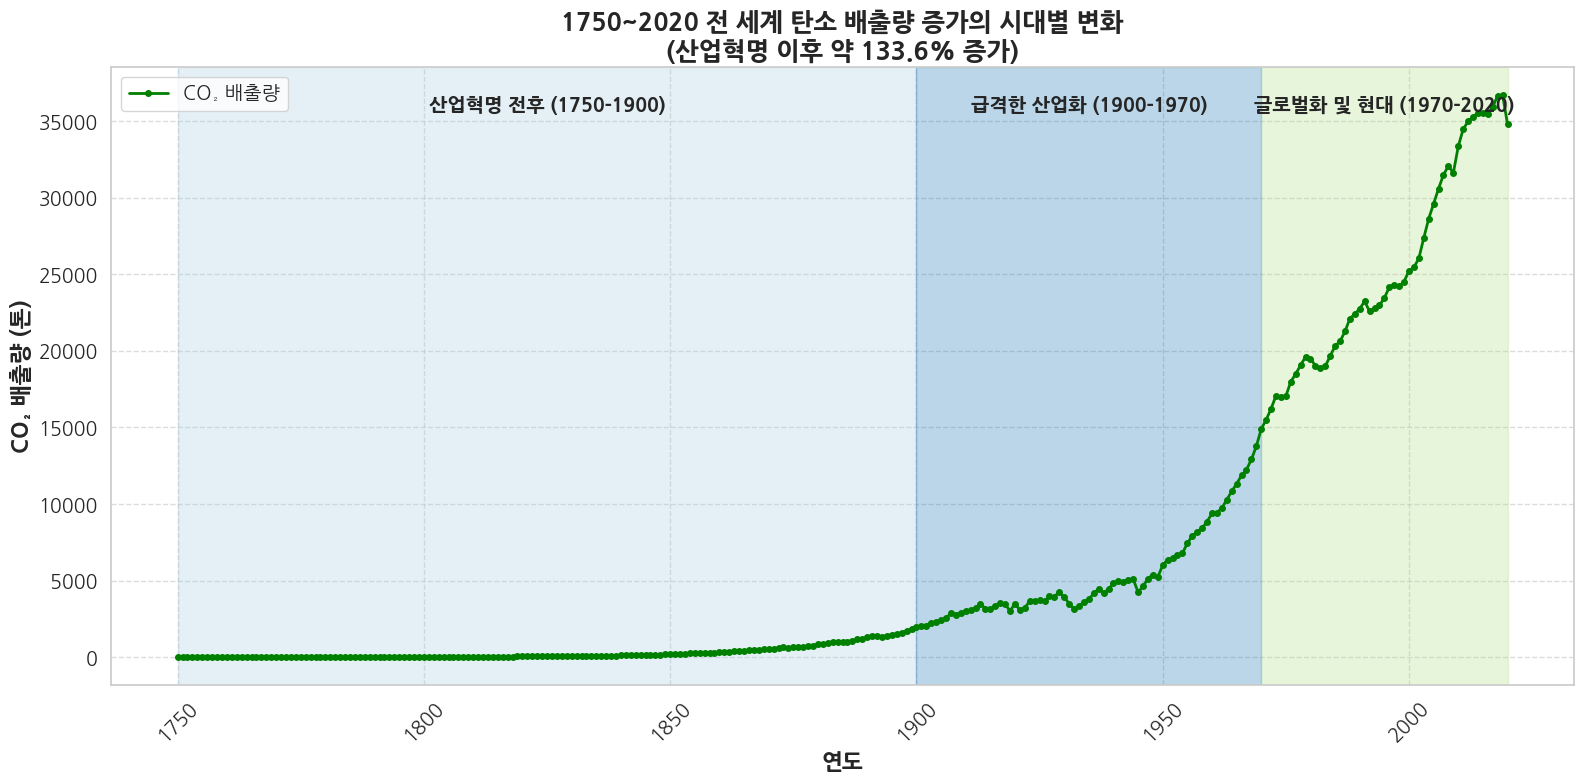

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. OWID CO₂ 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df.columns = df.columns.str.strip()

# 'World' 행이 있으면 그 데이터를 사용, 없으면 국가별 합산 (여기서는 'World' 행 사용)
if 'World' in df['country'].unique():
    df_world = df[df['country'] == 'World'].copy()
else:
    df_world = df.groupby('year', as_index=False)['co2'].sum()

# 연도와 co2 열을 숫자형으로 변환 및 정렬
df_world['year'] = pd.to_numeric(df_world['year'], errors='coerce')
df_world = df_world.dropna(subset=['year'])
df_world['year'] = df_world['year'].astype(int)
df_world = df_world.sort_values('year')

# 1750년부터 2020년까지의 데이터만 사용 (OWID 데이터에 따라 조정)
df_world = df_world[(df_world['year'] >= 1750) & (df_world['year'] <= 2020)]
df_world.rename(columns={'year': 'Year', 'co2': 'CO2_Emissions'}, inplace=True)

# 1970년과 2020년의 CO₂ 배출량을 이용하여 지난 50년간의 증가율 계산
co2_1970 = df_world[df_world['Year'] == 1970]['CO2_Emissions'].values[0]
co2_2020 = df_world[df_world['Year'] == 2020]['CO2_Emissions'].values[0]
perc_increase = ((co2_2020 - co2_1970) / co2_1970) * 100

# 2. 시대별 구간 정의 (실제 데이터 범위에 맞게 조정)
periods = [
    {"label": "산업혁명 전후 (1750-1900)", "start": 1750, "end": 1900, "color": "#a6cee3"},
    {"label": "급격한 산업화 (1900-1970)", "start": 1900, "end": 1970, "color": "#1f78b4"},
    {"label": "글로벌화 및 현대 (1970-2020)", "start": 1970, "end": 2020, "color": "#b2df8a"}
]

# 3. 시각화
fig, ax = plt.subplots(figsize=(16, 8))

# 실제 CO₂ 배출량 추세선을 그리기 (실제 데이터)
ax.plot(df_world['Year'], df_world['CO2_Emissions'], color='green', marker='o', markersize=4, linewidth=2, label='CO₂ 배출량')

# 시대별 구간을 영역으로 표시
for era in periods:
    ax.axvspan(era["start"], era["end"], color=era["color"], alpha=0.3)
    # 해당 구간의 중앙에 라벨 배치
    mid = (era["start"] + era["end"]) / 2
    ax.text(mid, ax.get_ylim()[1]*0.95, era["label"], ha='center', va='top', fontsize=14, fontweight='bold')

# 축 레이블 및 기타 스타일 설정
ax.set_xlabel("연도", fontsize=16, fontweight='bold')
ax.set_ylabel("CO₂ 배출량 (톤)", fontsize=16, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# 제목에 1970~2020년 증가율 포함
plt.title(f"1750~2020 전 세계 탄소 배출량 증가의 시대별 변화\n(산업혁명 이후 약 {perc_increase:.1f}% 증가)", fontsize=18, fontweight='bold')
ax.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

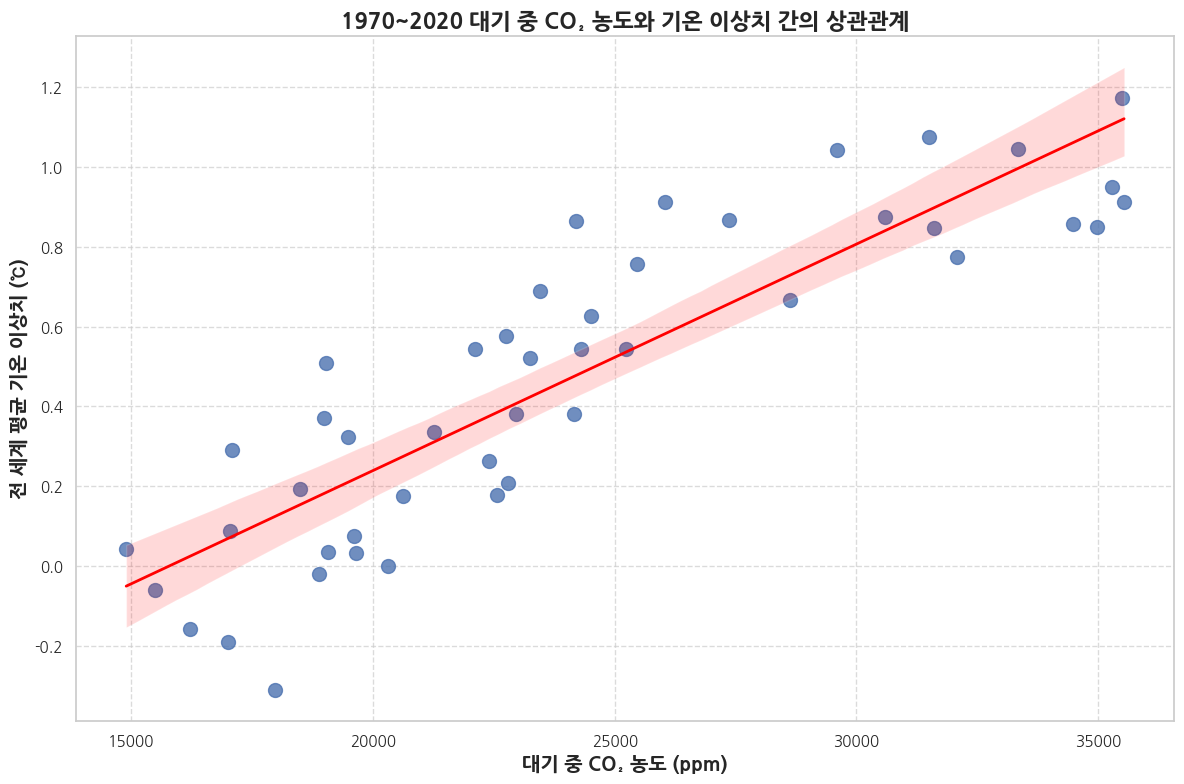

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# ------------------------------
# 1. OWID CO₂ 데이터 불러오기 및 전처리
# ------------------------------
df_co2 = pd.read_csv('/content/owid-co2-data.csv')
df_co2.columns = df_co2.columns.str.strip()

# 'World' 행 사용 (없다면 국가별 합산)
if 'World' in df_co2['country'].unique():
    df_global_co2 = df_co2[df_co2['country'] == 'World'].copy()
else:
    df_global_co2 = df_co2.groupby('year', as_index=False)['co2'].sum()

# 'year'를 숫자형으로 변환
df_global_co2['year'] = pd.to_numeric(df_global_co2['year'], errors='coerce').astype(int)
df_global_co2 = df_global_co2.sort_values('year')

# 데이터 범위: 1970~2020년 (필요에 따라 조정)
df_global_co2 = df_global_co2[(df_global_co2['year'] >= 1970) & (df_global_co2['year'] <= 2020)]
df_global_co2.rename(columns={'year': 'Year'}, inplace=True)

# CO₂ 농도 관련 열이 있다면 사용(예: 'co2_ppm') - 없다면 'co2'를 대체로 사용
if 'co2_ppm' in df_global_co2.columns:
    df_global_co2.rename(columns={'co2_ppm': 'CO2_ppm'}, inplace=True)
else:
    # 여기서는 배출량 수치를 ppm으로 직접 변환하기는 어렵지만, 실제 관측된 CO₂ 농도 자료가 없다면
    # 'co2' 열을 사용하여 상대적 추세로 대체할 수 있습니다.
    df_global_co2.rename(columns={'co2': 'CO2_ppm'}, inplace=True)

# ------------------------------
# 2. 전 세계 평균 기온 데이터 불러오기 및 이상치 계산
# ------------------------------
df_temp = pd.read_csv('/content/GlobalTemperatures.csv')
df_temp.columns = df_temp.columns.str.strip()

# 예: df_temp에 'dt' (날짜)와 'LandAverageTemperature' 열이 있다고 가정
df_temp['dt'] = pd.to_datetime(df_temp['dt'], errors='coerce')
df_temp['Year'] = df_temp['dt'].dt.year

# 연도별 평균 기온 계산
annual_temp = df_temp.groupby('Year')['LandAverageTemperature'].mean().reset_index()

# 기준 기간(예: 1951~1980년)의 평균 기온을 기준으로 이상치 계산
baseline_period = annual_temp[(annual_temp['Year'] >= 1951) & (annual_temp['Year'] <= 1980)]
baseline_avg = baseline_period['LandAverageTemperature'].mean()
annual_temp['Temp_Anomaly'] = annual_temp['LandAverageTemperature'] - baseline_avg

# 데이터 범위: 1970~2020년
annual_temp = annual_temp[(annual_temp['Year'] >= 1970) & (annual_temp['Year'] <= 2020)]

# ------------------------------
# 3. 데이터 병합 (연도 기준)
# ------------------------------
merged = pd.merge(df_global_co2[['Year', 'CO2_ppm']],
                  annual_temp[['Year', 'Temp_Anomaly']],
                  on='Year', how='inner')

# ------------------------------
# 4. 시각화: CO₂ 농도와 기온 이상치의 상관관계 (실제 데이터)
# ------------------------------
plt.figure(figsize=(12,8))
sns.regplot(
    x='CO2_ppm',
    y='Temp_Anomaly',
    data=merged,
    marker='o',
    scatter_kws={'s': 100, 'alpha': 0.8},
    line_kws={'color': 'red', 'lw': 2}
)
plt.xlabel("대기 중 CO₂ 농도 (ppm)", fontsize=14, fontweight='bold')
plt.ylabel("전 세계 평균 기온 이상치 (℃)", fontsize=14, fontweight='bold')
plt.title("1970~2020 대기 중 CO₂ 농도와 기온 이상치 간의 상관관계", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

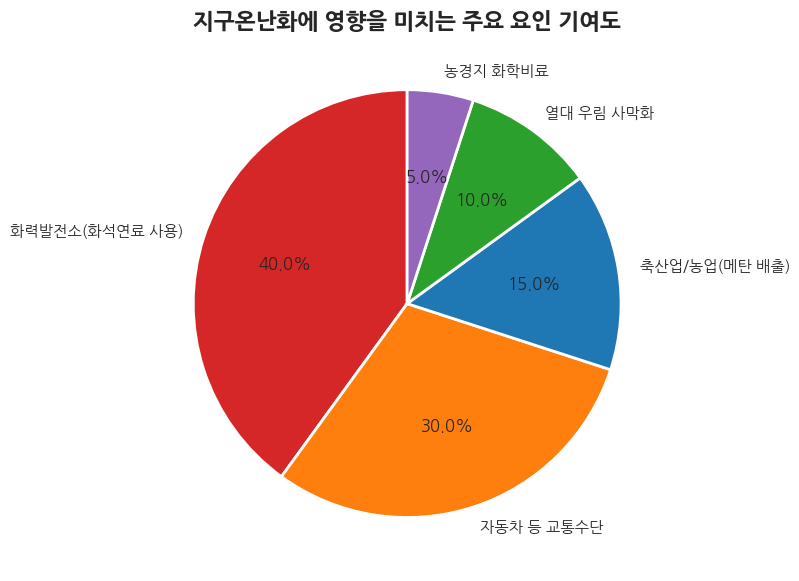

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 요인과 기여 비율 (예시)
labels = ['화력발전소(화석연료 사용)', '자동차 등 교통수단', '축산업/농업(메탄 배출)', '열대 우림 사막화', '농경지 화학비료']
sizes = [40, 30, 15, 10, 5]
colors = ['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c', '#9467bd']

plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='white', linewidth=2)  # 각 조각 경계선을 흰색, 두께 2로 강조
)
plt.title("지구온난화에 영향을 미치는 주요 요인 기여도", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

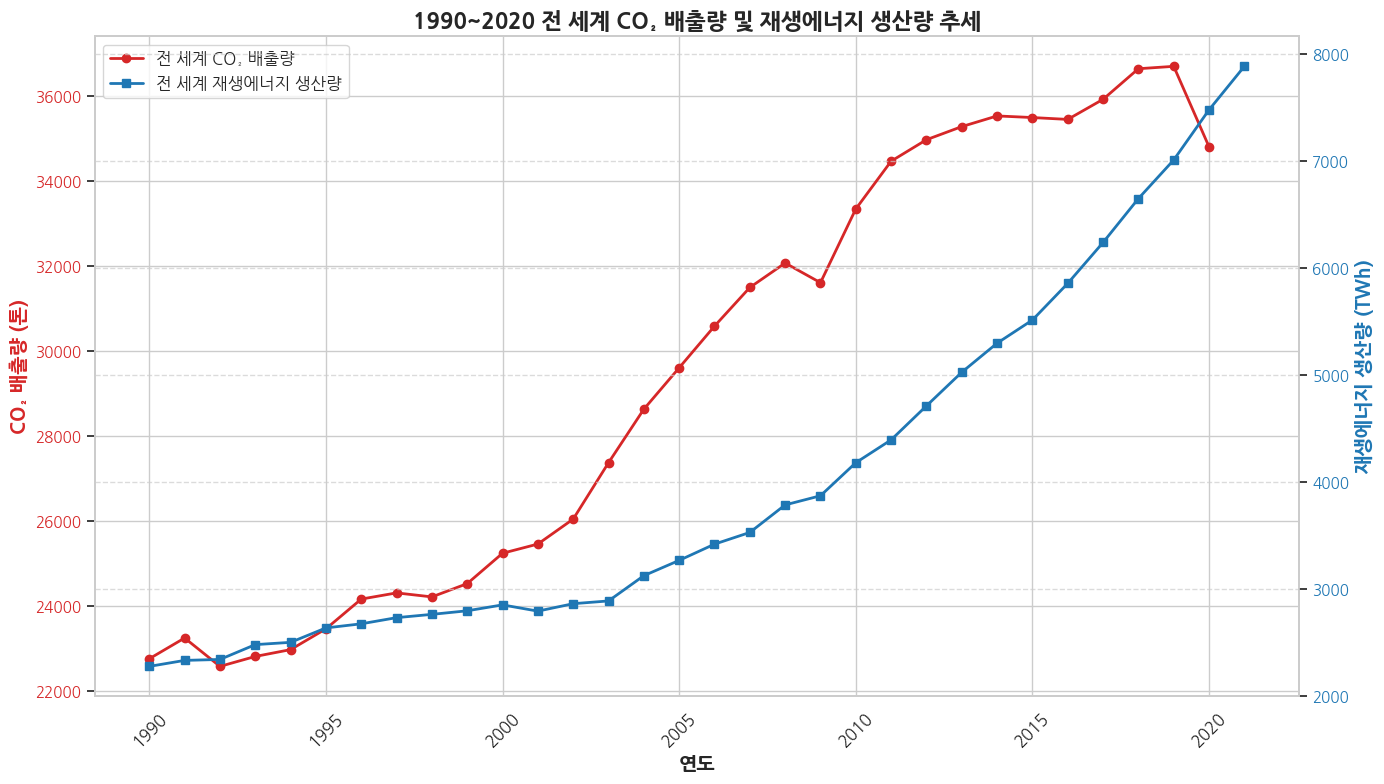

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# ------------------------------
# 1. OWID CO₂ 데이터 불러오기 및 전처리
# ------------------------------
df_co2 = pd.read_csv('/content/owid-co2-data.csv')
df_co2.columns = df_co2.columns.str.strip()

# 'World' 행이 있으면 이를 사용, 없으면 국가별 합산
if 'World' in df_co2['country'].unique():
    df_global_co2 = df_co2[df_co2['country'] == 'World'].copy()
else:
    df_global_co2 = df_co2.groupby('year', as_index=False)['co2'].sum()

df_global_co2['year'] = pd.to_numeric(df_global_co2['year'], errors='coerce').astype(int)
df_global_co2 = df_global_co2.sort_values('year')
# 분석 범위: 1990~2020년
df_global_co2 = df_global_co2[(df_global_co2['year'] >= 1990) & (df_global_co2['year'] <= 2020)]
df_global_co2.rename(columns={'year': 'Year', 'co2': 'CO2_Emissions'}, inplace=True)

# ------------------------------
# 2. 재생에너지 데이터 불러오기 및 전처리 (03 modern-renewable-prod.csv)
# ------------------------------
df_renew = pd.read_csv('/content/03 modern-renewable-prod.csv')
df_renew.columns = df_renew.columns.str.strip()
df_renew = df_renew.dropna(subset=['Entity', 'Year'])
df_renew['Year'] = pd.to_numeric(df_renew['Year'], errors='coerce').astype(int)

# 재생에너지 관련 열 (열 이름은 실제 데이터에 맞춰 조정)
energy_cols = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]
for col in energy_cols:
    df_renew[col] = pd.to_numeric(df_renew[col], errors='coerce').fillna(0)

df_renew['Total Renewable (TWh)'] = df_renew[energy_cols].sum(axis=1)

# 'World' 행이 있으면 이를 사용, 없으면 국가별 합산
if 'World' in df_renew['Entity'].unique():
    df_global_renew = df_renew[df_renew['Entity'] == 'World'].copy()
else:
    df_global_renew = df_renew.groupby('Year', as_index=False)['Total Renewable (TWh)'].sum()

df_global_renew = df_global_renew.sort_values('Year')
# 분석 범위: 1990~2020년
df_global_renew = df_global_renew[(df_global_renew['Year'] >= 1990) & (df_global_renew['Year'] <= 2025)]

# ------------------------------
# 3. 이중 y축 그래프 시각화
# ------------------------------
fig, ax1 = plt.subplots(figsize=(14,8))

# 왼쪽 y축: 전 세계 CO₂ 배출량 (톤)
color_co2 = "#d62728"
ax1.plot(df_global_co2['Year'], df_global_co2['CO2_Emissions'],
         marker='o', linestyle='-', linewidth=2, color=color_co2, label='전 세계 CO₂ 배출량')
ax1.set_xlabel('연도', fontsize=14, fontweight='bold')
ax1.set_ylabel('CO₂ 배출량 (톤)', fontsize=14, fontweight='bold', color=color_co2)
ax1.tick_params(axis='y', labelcolor=color_co2)
ax1.tick_params(axis='x', rotation=45, labelsize=12)

# 오른쪽 y축: 전 세계 재생에너지 생산량 (TWh)
ax2 = ax1.twinx()
color_renew = "#1f77b4"
ax2.plot(df_global_renew['Year'], df_global_renew['Total Renewable (TWh)'],
         marker='s', linestyle='-', linewidth=2, color=color_renew, label='전 세계 재생에너지 생산량')
ax2.set_ylabel('재생에너지 생산량 (TWh)', fontsize=14, fontweight='bold', color=color_renew)
ax2.tick_params(axis='y', labelcolor=color_renew)
ax2.tick_params(axis='x', labelsize=12)

# 범례 병합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

plt.title("1990~2020 전 세계 CO₂ 배출량 및 재생에너지 생산량 추세", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-25-d18950678901>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



               CO2_change_pct  Renew_change_pct
China              329.316278       1622.971934
Denmark            -51.104101       2725.301205
Germany            -38.781560       1216.649215
Sweden             -32.665830         50.638012
United States       -7.835876        132.738835


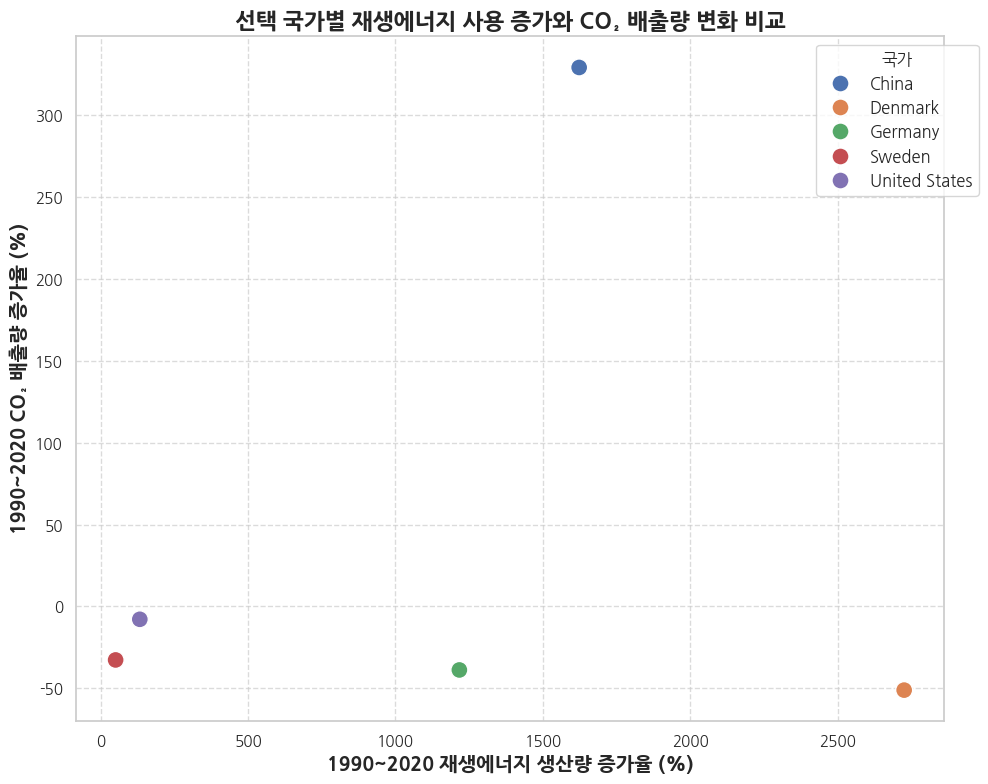

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# ------------------------------
# 1. 선택 국가 리스트
# ------------------------------
selected_countries = ["Germany", "Denmark", "Sweden", "United States", "China"]

# ------------------------------
# 2. OWID CO₂ 데이터 불러오기 및 전처리 (1990, 2020년 데이터)
# ------------------------------
df_co2 = pd.read_csv('/content/owid-co2-data.csv')
df_co2.columns = df_co2.columns.str.strip()
df_co2 = df_co2.dropna(subset=['country', 'year', 'co2'])
df_co2['year'] = pd.to_numeric(df_co2['year'], errors='coerce').astype(int)

# 선택 국가 및 1990, 2020년 데이터 필터링
co2_1990 = df_co2[(df_co2['country'].isin(selected_countries)) & (df_co2['year'] == 1990)]
co2_2020 = df_co2[(df_co2['country'].isin(selected_countries)) & (df_co2['year'] == 2020)]
co2_1990 = co2_1990[['country', 'co2']].set_index('country')
co2_2020 = co2_2020[['country', 'co2']].set_index('country')

# ------------------------------
# 3. 재생에너지 데이터 불러오기 및 전처리 (03 modern-renewable-prod.csv; 1990, 2020년 데이터)
# ------------------------------
df_renew = pd.read_csv('/content/03 modern-renewable-prod.csv')
df_renew.columns = df_renew.columns.str.strip()
df_renew = df_renew.dropna(subset=['Entity', 'Year'])
df_renew['Year'] = pd.to_numeric(df_renew['Year'], errors='coerce').astype(int)

# 재생에너지 관련 열 (열 이름은 실제 데이터에 맞게 조정)
energy_cols = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]
for col in energy_cols:
    df_renew[col] = pd.to_numeric(df_renew[col], errors='coerce').fillna(0)

df_renew['Total Renewable (TWh)'] = df_renew[energy_cols].sum(axis=1)

# 선택 국가 및 1990, 2020년 데이터 필터링 (국가명: 'Entity')
renew_1990 = df_renew[(df_renew['Entity'].isin(selected_countries)) & (df_renew['Year'] == 1990)]
renew_2020 = df_renew[(df_renew['Entity'].isin(selected_countries)) & (df_renew['Year'] == 2020)]
renew_1990 = renew_1990[['Entity', 'Total Renewable (TWh)']].set_index('Entity')
renew_2020 = renew_2020[['Entity', 'Total Renewable (TWh)']].set_index('Entity')

# ------------------------------
# 4. 각 국가별 변화율 계산 (1990 ~ 2020)
# ------------------------------
# CO₂ 배출량 증가율 (%)
co2_change = ((co2_2020['co2'] - co2_1990['co2']) / co2_1990['co2']) * 100
# 재생에너지 생산량 증가율 (%)
renew_change = ((renew_2020['Total Renewable (TWh)'] - renew_1990['Total Renewable (TWh)']) / renew_1990['Total Renewable (TWh)']) * 100

# 두 변수 합치기
change_df = pd.DataFrame({
    'CO2_change_pct': co2_change,
    'Renew_change_pct': renew_change
}).dropna()

print(change_df)

# ------------------------------
# 5. 산점도 시각화
# ------------------------------
plt.figure(figsize=(10,8))
sns.scatterplot(data=change_df, x='Renew_change_pct', y='CO2_change_pct', hue=change_df.index, s=150)
plt.xlabel("1990~2020 재생에너지 생산량 증가율 (%)", fontsize=14, fontweight='bold')
plt.ylabel("1990~2020 CO₂ 배출량 증가율 (%)", fontsize=14, fontweight='bold')
plt.title("선택 국가별 재생에너지 사용 증가와 CO₂ 배출량 변화 비교", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="국가", bbox_to_anchor=(1.05, 1), fontsize=12)
plt.tight_layout()
plt.show()